# Introduction

After doing some excercise, the first thing I do, as a Data enthusiast, is to analyze the session's information my Garmin watch has captured. Unfortunately, my life keeps going and it is quite uncomfortable to playing around with this data in this diminute watch interface. Then I thought I could pull all this data from the Garmin account and check my own stats!

Through using this github repository (https://github.com/pe-st/garmin-connect-export), I was able to pull my data from my Garmin Connect account, in which all this information is stored.

However, this method only pulls a fraction of all the information gathered by the smartwatch. However, it is possible to access all your data by requesting it to Garmin (https://www.garmin.com/es-ES/account/datamanagement/). They will send the information in less than 30 days. In my experience, I've always received all the information in just a few hours.

One key feature of Garmin is that dozens of sleep data are captured at night. Using this GitHub repository's script, ExtractGarminData.py (https://github.com/tintin305/GarminSleepAnalytics/tree/master), I was able to extract all of my Sleep Data as well from the files exported.

The Data showcased in this project start in late November/December, when I decided to take a bargain of a Garmin Forerunner 265 during Black Friday :)

Let's check it out!

# Exploratory Data Analysis (EDA)

### Activities Data

Let's take a quick look at our activities data.

In [96]:
import pandas as pd
df_activities = pd.read_csv("C:/Users/alexa/OneDrive/Documents/Code/Python/Projects/Garmin Data/garmin-connect-export-master/2025-07-25_garmin_connect_export/activities.csv")
df_activities.shape

(159, 50)

In [97]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Start Time                             159 non-null    object 
 1   End Time                               159 non-null    object 
 2   Activity ID                            159 non-null    int64  
 3   Activity Name                          159 non-null    object 
 4   Description                            1 non-null      object 
 5   Location Name                          69 non-null     object 
 6   Time Zone                              159 non-null    object 
 7   Offset                                 159 non-null    object 
 8   Duration (h:m:s)                       159 non-null    object 
 9   Elapsed Duration (h:m:s)               159 non-null    object 
 10  Moving Duration (h:m:s)                154 non-null    object 
 11  Activi

It seems like my Garmin is not sync with a weather app (I typically don't carry my phone during my workouts). Also, it seems like cadence is not captured either. Fortunately, I didn't suffered from any strokes during my workouts. I can confirm this is true :)

Let's drop this column:

In [98]:
df_activities.dropna(axis=1, how='all', inplace = True)

In [99]:
df_activities.head()

Start Time                   End Time  Activity ID  \
0  2025-07-23T18:27:35+02:00  2025-07-23T19:58:26+02:00  19826750062   
1  2025-07-21T18:25:11+02:00  2025-07-21T19:55:55+02:00  19804847077   
2  2025-07-20T09:53:48+02:00  2025-07-20T11:27:52+02:00  19790028215   
3  2025-07-19T22:00:54+02:00  2025-07-19T22:06:28+02:00  19785993661   
4  2025-07-19T09:48:34+02:00  2025-07-19T10:28:34+02:00  19779226448   

                   Activity Name Description Location Name     Time Zone  \
0                         Fuerza         NaN           NaN  Europe/Paris   
1                         Fuerza         NaN           NaN  Europe/Paris   
2                         Fuerza         NaN           NaN  Europe/Paris   
3  Relajación y concentración (c         NaN           NaN  Europe/Paris   
4             Bicicleta estática         NaN           NaN  Europe/Paris   

   Offset Duration (h:m:s) Elapsed Duration (h:m:s)  ...  \
0  +02:00         01:30:51                 01:30:51  ...   
1  +02:00         01:30:44                 01:30:44  ...   
2  +02:00         01:34:04                 01:34:04  ...   
3  +02:00         00:05:34                 00:05:34  ...   
4  +02:00         00:40:00                 00:40:00  ...   

  Max. Heart Rate (bpm) Average Heart Rate (bpm) Calories VO2max  \
0                 140.0                    103.0    396.0    NaN   
1                 137.0                     97.0    424.0    NaN   
2                 142.0                    103.0    497.0    NaN   
3                  84.0                     72.0      NaN    NaN   
4                 129.0                    112.0    298.0    NaN   

  Aerobic Training Effect Anaerobic Training Effect Avg. Run Cadence  \
0                     0.7                       0.5              NaN   
1                     0.4                       0.1              NaN   
2                     0.8                       0.2              NaN   
3                     NaN                       NaN              NaN   
4                     1.2                       NaN              NaN   

   Max. Run Cadence  Stride Length  Steps  
0               NaN            NaN  396.0  
1               NaN            NaN  398.0  
2               NaN            NaN  538.0  
3               NaN            NaN    NaN  
4               NaN            NaN    NaN  

[5 rows x 43 columns]

In [100]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Start Time                             159 non-null    object 
 1   End Time                               159 non-null    object 
 2   Activity ID                            159 non-null    int64  
 3   Activity Name                          159 non-null    object 
 4   Description                            1 non-null      object 
 5   Location Name                          69 non-null     object 
 6   Time Zone                              159 non-null    object 
 7   Offset                                 159 non-null    object 
 8   Duration (h:m:s)                       159 non-null    object 
 9   Elapsed Duration (h:m:s)               159 non-null    object 
 10  Moving Duration (h:m:s)                154 non-null    object 
 11  Activi

In [101]:
sum_cols = ['Steps','Calories','Elevation Gain (m)',
            'Distance (km)']
df_activities[sum_cols].sum()

Steps                 533452.00000
Calories               79428.00000
Elevation Gain (m)      1904.00000
Distance (km)            560.73863
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

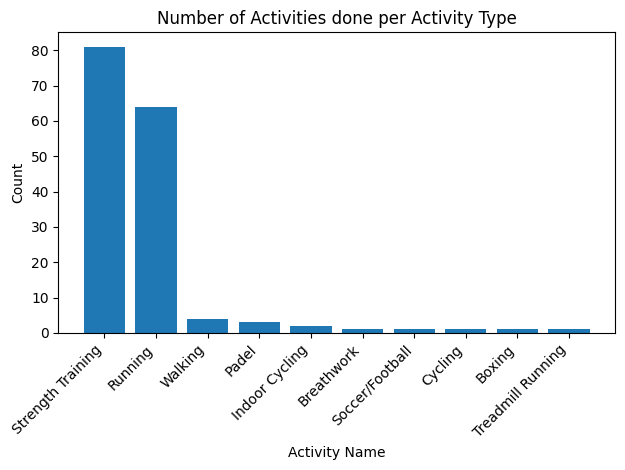

In [102]:
import matplotlib.pyplot as plt

counts = df_activities['Activity Type'].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel('Activity Name')
plt.ylabel('Count')
plt.title('Number of Activities done per Activity Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

As I already expected, most of my Fitness activities are lonely :( 

I typically just work-out in the gym or simply go for a run. Let's see how these two activities compare in terms of Average Heart Beat and Maximum Heart Beat.

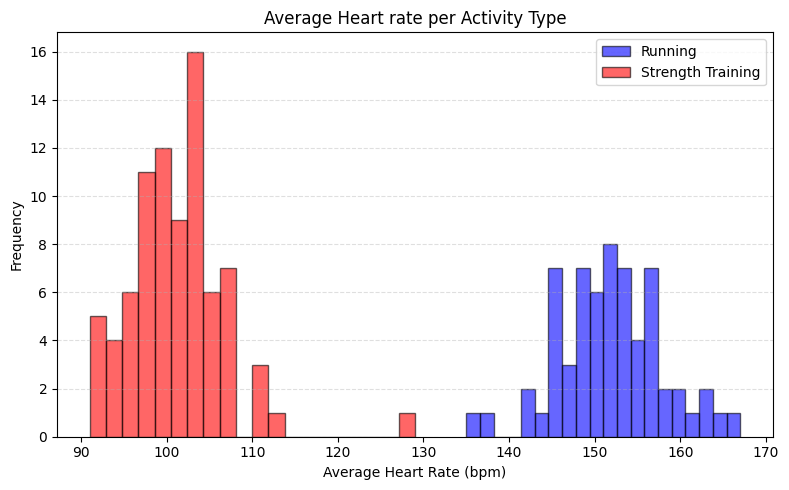

In [103]:
bins = 20

strength_averageHR = df_activities[df_activities['Activity Type'] == 'Strength Training']['Average Heart Rate (bpm)'].dropna()
running_averageHR  = df_activities[df_activities['Activity Type'] == 'Running']['Average Heart Rate (bpm)'].dropna()

plt.figure(figsize=(8, 5))

# Running Average HR Hist
plt.hist(running_averageHR, bins=bins, 
         color='blue',        
         alpha=0.6,           
         edgecolor='black',   
         label='Running')

# Gym Average HR Hist
plt.hist(strength_averageHR, bins=bins, 
         color='red', 
         alpha=0.6, 
         edgecolor='black',
         label='Strength Training')

# Lables and title
plt.xlabel('Average Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Average Heart rate per Activity Type')

# Legend, grif and layout
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

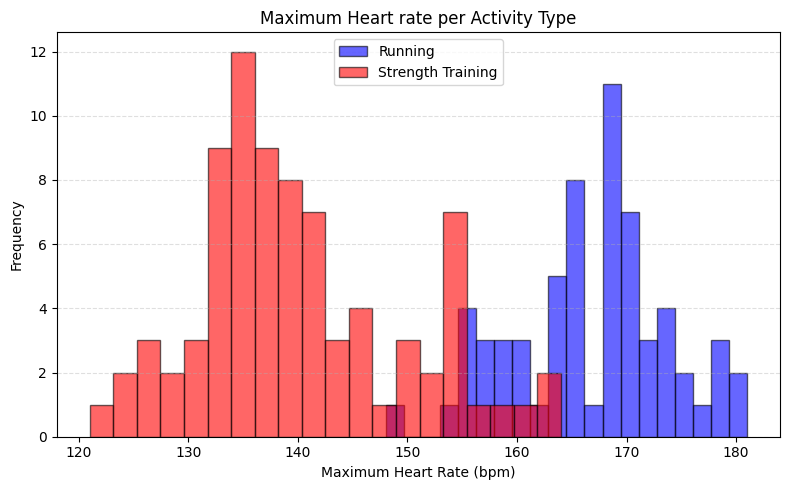

In [104]:
bins = 20

strength_maxHR = df_activities[df_activities['Activity Type'] == 'Strength Training']['Max. Heart Rate (bpm)'].dropna()
running_maxHR  = df_activities[df_activities['Activity Type'] == 'Running']['Max. Heart Rate (bpm)'].dropna()

plt.figure(figsize=(8, 5))

# Running Average HR Hist
plt.hist(running_maxHR, bins=bins, 
         color='blue',        
         alpha=0.6,           
         edgecolor='black',   
         label='Running')

# Gym Average HR Hist
plt.hist(strength_maxHR, bins=bins, 
         color='red', 
         alpha=0.6, 
         edgecolor='black',
         label='Strength Training')

# Lables and title
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Maximum Heart rate per Activity Type')

# Legend, grif and layout
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

It seems like, on average, my heart rate is higher during cardio activities. However, the difference is shorten when taking into account Maximum Heart Rate recorded during a single session. This is probably due to heavy sets in Leg Day. Squats and Deadlifts are exhausting! It could be great if Garmin's autodetection system for recording which type of excercise is being performed (e.g squat, deadlift, bench press, etc.) could work better, so I could extract more insights regarding my WOs.

Now, let's check when I mostly train!

In [105]:
df_activities['Start Time'] = pd.to_datetime(df_activities['Start Time'], utc = True)

<Figure size 1000x600 with 0 Axes>

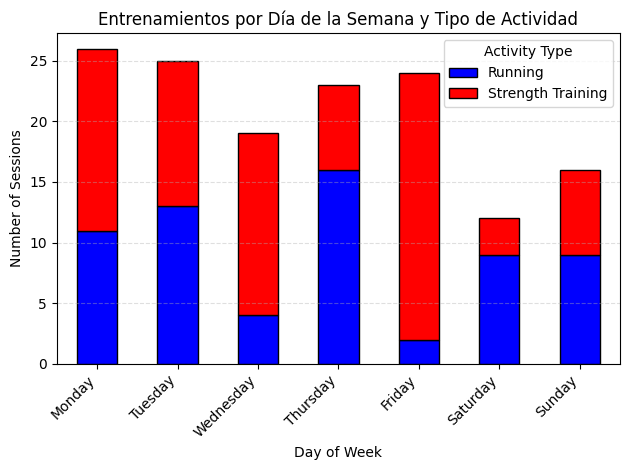

In [106]:
# Determine day of the week --> Monday, Tuesday, Wednesday, etc.
df_activities['Weekday'] = df_activities['Start Time'].dt.day_name() 

# Filter data we need
mask = df_activities['Activity Type'].isin(['Running', 'Strength Training'])
sub = df_activities.loc[mask, ['Weekday', 'Activity Type']]

# Count sessions per weekday and group by activit type
counts = sub.groupby(['Weekday', 'Activity Type']) \
            .size() \
            .unstack(fill_value=0)

# Reorder the Weekdays
ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = counts.reindex(ordered)

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', 
            stacked=True, 
            color=['blue', 'red'],   # running=blue, strength=red
            edgecolor='black')

plt.xlabel('Day of Week')
plt.ylabel('Number of Sessions')
plt.title('Entrenamientos por Día de la Semana y Tipo de Actividad')
plt.legend(title='Activity Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


We can repeat this excercise for the Months since I bought my Garmin wtach!

C:\Users\alexa\AppData\Local\Temp\ipykernel_23264\4045094107.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_activities['YearMonth'] = df_activities['Start Time'].dt.to_period('M')


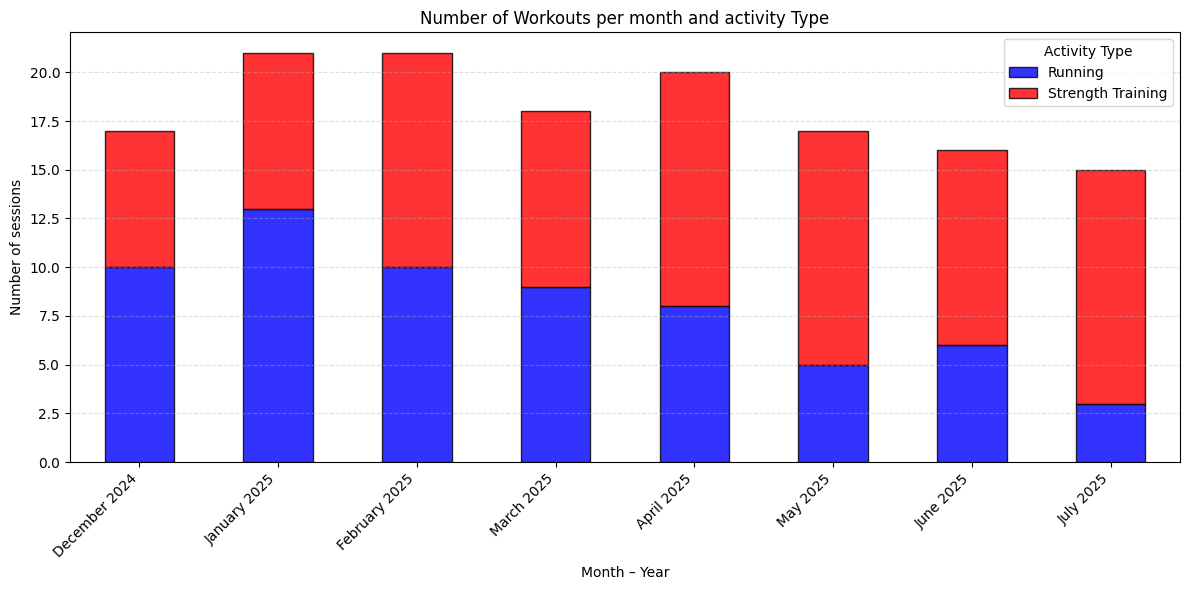

In [107]:
# Create a new column for Month - Year
df_activities['YearMonth'] = df_activities['Start Time'].dt.to_period('M')

mask = df_activities['Activity Type'].isin(['Running', 'Strength Training'])
sub = df_activities.loc[mask, ['YearMonth', 'Activity Type']]

counts = (
    sub
    .groupby(['YearMonth', 'Activity Type'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

all_months = pd.period_range(
    start=df_activities['YearMonth'].min(),
    end=  df_activities['YearMonth'].max(),
    freq='M'
)

counts = counts.reindex(all_months, fill_value=0)

labels = [p.strftime('%B %Y') for p in counts.index]

plt.figure(figsize=(12, 6))
counts.plot(
    kind='bar',
    stacked=True,
    edgecolor='black',
    color=['blue','red'],
    alpha=0.8,
    legend=True,
    ax=plt.gca()
)
plt.xlabel('Month – Year')
plt.ylabel('Number of sessions')
plt.title('Number of Workouts per month and activity Type')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

This result was a little bit unexpected for me, since I have the feeling I've been working out more time lately. However, the number of sessions I've had since April has been dropping. Let's check how long have my sessions been during this months. 

<Figure size 1200x600 with 0 Axes>

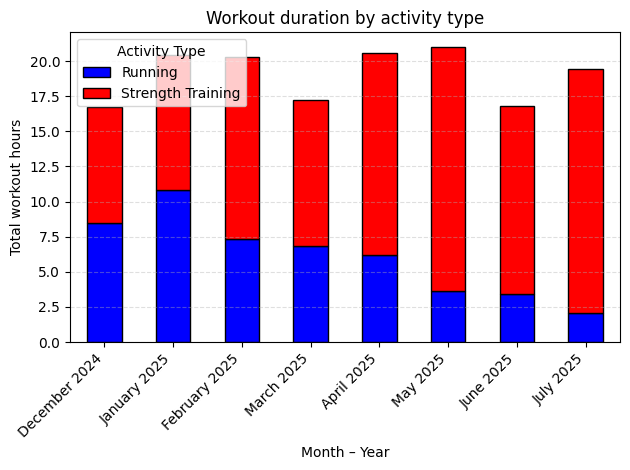

In [108]:
# Convert duration to timedelta datatype
df_activities['Duration_td'] = pd.to_timedelta(df_activities['Duration (h:m:s)'])


# Keep the data that we need (only Running and Activity type, see mask df in previous chunk)
sub = df_activities.loc[mask, ['YearMonth', 'Activity Type', 'Duration_td']]

# Group and sum
duration_sum = (
    sub
    .groupby(['YearMonth', 'Activity Type'])['Duration_td']
    .sum()
    .unstack(fill_value=pd.Timedelta(0))
    .sort_index()
)

# Covert to hours
duration_hours = duration_sum / pd.Timedelta(hours=1)

# Plot
plt.figure(figsize=(12, 6))
duration_hours.plot(
    kind='bar',
    stacked=True,
    edgecolor='black',
    color = ["blue","red"]
)

labels = [p.strftime('%B %Y') for p in counts.index]
plt.xlabel('Month – Year')
plt.ylabel('Total workout hours')
plt.title('Workout duration by activity type')
plt.xticks(
    ticks=range(len(duration_hours.index)),
    labels=labels,
    rotation=45,
    ha='right'
)
plt.legend(title='Activity Type')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


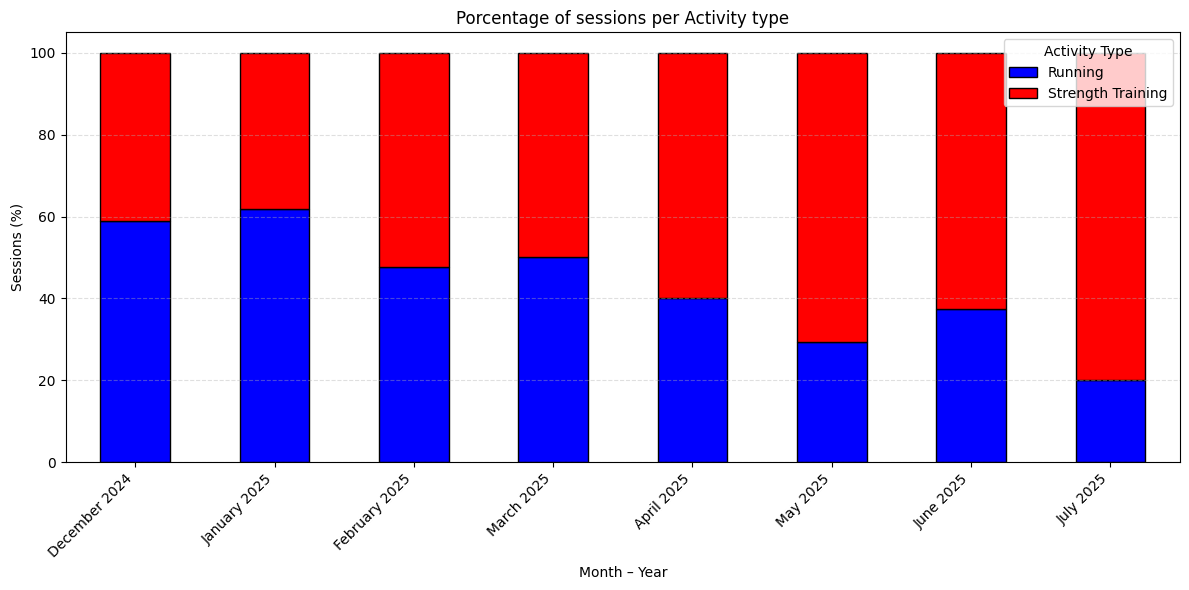

In [109]:
# Swap to %
percent = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
ax = percent.plot(
    kind='bar',
    stacked=True,
    edgecolor='black',
    color = ["blue", "red"],
    figsize=(12, 6)
)
ax.set_xlabel('Month – Year')
ax.set_ylabel('Sessions (%)')
ax.set_title('Porcentage of sessions per Activity type')
ax.set_xticks(range(len(percent.index)))
ax.set_xticklabels([p.strftime('%B %Y') for p in percent.index], rotation=45, ha='right')
ax.legend(title='Activity Type', loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


Lastly, I think it would be interesting to see how many kilometers I run per month. I expect to see a decrease after my last Half Marathon in April.

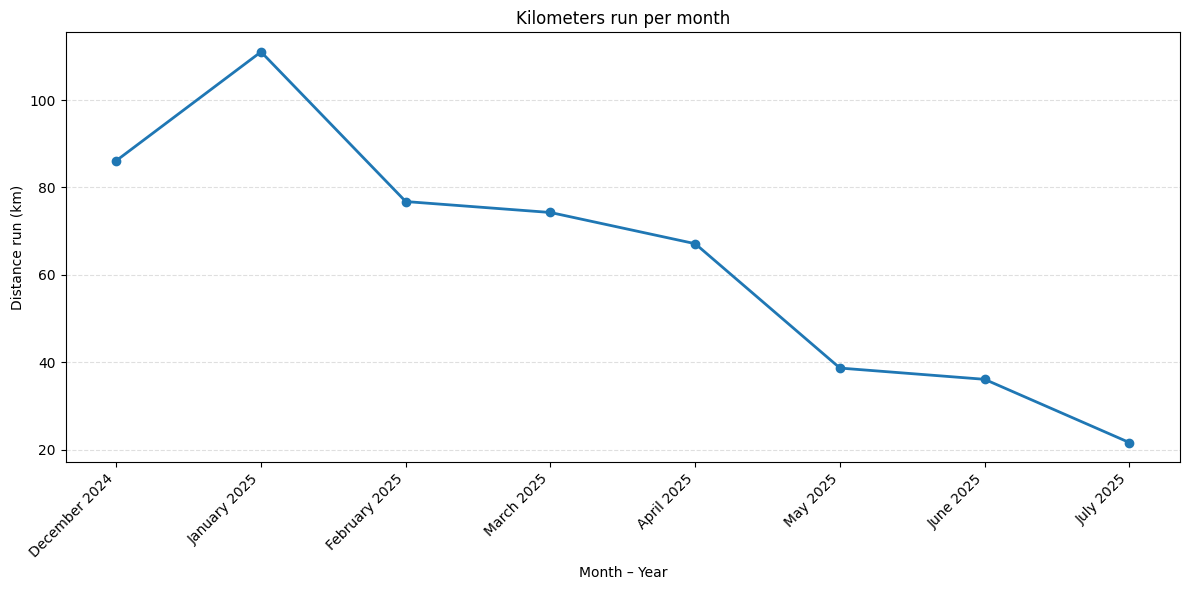

In [110]:
df_run = df_activities[df_activities['Activity Type'] == 'Running']
sub = df_run.loc[mask, ['YearMonth', 'Distance (km)']]

distance_sum = (
    sub
    .groupby('YearMonth')['Distance (km)']
    .sum()
    .sort_index()
)

labels = [p.strftime('%B %Y') for p in distance_sum.index]

x = list(range(len(distance_sum)))

plt.figure(figsize=(12, 6))
plt.plot(
    x, 
    distance_sum.values, 
    marker='o',      # each value is a point
    linestyle='-',   # line
    linewidth=2,     
    markersize=6     
)

plt.xlabel('Month – Year')
plt.ylabel('Distance run (km)')
plt.title('Kilometers run per month')
plt.xticks(
    ticks=x,
    labels=labels,
    rotation=45,
    ha='right'
)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Sleep Data

It has been widely demonstrated that, sleep quality is key for performance. Let's check my sleep data!

In [111]:
df_sleep = pd.read_csv("C:/Users/alexa/OneDrive/Documents/Code/Python/Projects/Garmin Data/data/DI_CONNECT/DI-Connect-Wellness/sleepData/ConfirmedSleepDataEntries.csv")
df_sleep.shape

(232, 20)

In [112]:
df_sleep.head()

sleepStartTimestampGMT sleepEndTimestampGMT calendarDate  \
0    2024-12-04 23:25:40  2024-12-05 06:54:40   2024-12-05   
1    2024-12-06 05:54:15  2024-12-06 10:07:15   2024-12-06   
2    2024-12-07 00:33:50  2024-12-07 08:22:50   2024-12-07   
3    2024-12-07 22:38:31  2024-12-08 07:13:25   2024-12-08   
4    2024-12-08 21:08:05  2024-12-09 05:55:05   2024-12-09   

  sleepWindowConfirmationType  deepSleepSeconds  lightSleepSeconds  \
0    ENHANCED_CONFIRMED_FINAL            4080.0            15960.0   
1    ENHANCED_CONFIRMED_FINAL            4380.0             7860.0   
2    ENHANCED_CONFIRMED_FINAL            3300.0            17460.0   
3    ENHANCED_CONFIRMED_FINAL            3540.0            20040.0   
4    ENHANCED_CONFIRMED_FINAL            4140.0            21900.0   

   remSleepSeconds  awakeSleepSeconds  unmeasurableSeconds  \
0           5880.0             1020.0                  0.0   
1              NaN             2940.0                  0.0   
2           7380.0                0.0                  0.0   
3           7260.0               60.0                  0.0   
4           4860.0              720.0                  0.0   

   averageRespiration  lowestRespiration  highestRespiration  retro  \
0                13.0               10.0                15.0  False   
1                14.0               11.0                15.0  False   
2                12.0                8.0                15.0  False   
3                12.0                9.0                16.0  False   
4                12.0                8.0                15.0  False   

   awakeCount  avgSleepStress  \
0         0.0       10.730000   
1         3.0       60.810001   
2         0.0       16.650000   
3         0.0       17.020000   
4         1.0       24.900000   

                                         sleepScores  restlessMomentCount  \
0  {'overallScore': 85, 'qualityScore': 91, 'dura...                 33.0   
1  {'overallScore': 26, 'qualityScore': 38, 'dura...                 12.0   
2  {'overallScore': 87, 'qualityScore': 88, 'dura...                 28.0   
3  {'overallScore': 88, 'qualityScore': 87, 'dura...                 32.0   
4  {'overallScore': 77, 'qualityScore': 73, 'dura...                 45.0   

                                             napList spo2SleepSummary  \
0                                                NaN              NaN   
1  [{'napTimeSec': 7320, 'napStartTimestampGMT': ...              NaN   
2                                                NaN              NaN   
3                                                NaN              NaN   
4                                                NaN              NaN   

  breathingDisruptionSeverity  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN

After taking a look at the dataframe, we see that some variables have some other variables nested. In order to unstack them, we will modify the original script. I've seen that the napList variable has the same issue, so it is needed to adjust accordingly as well. Instead of obatining a CSV file, let's load the data directly in a Pandas dataframe.

In [113]:
import glob
import pandas as pd

def loadData():
    folderLocation = (
        'C:/Users/alexa/OneDrive/Documents/Code/Python/'
        'Projects/Garmin Data/data/DI_CONNECT/DI-Connect-Wellness/'
        'sleepData/*.json'
    )
    fileNames = glob.glob(folderLocation)

    sleepData = pd.DataFrame()
    for sleepFile in fileNames:
        data = pd.read_json(sleepFile)
        sleepData = pd.concat([sleepData, data], ignore_index=True, sort=False)

    # Convert to datetime datatype
    sleepData['sleepStartTimestampGMT'] = pd.to_datetime(sleepData['sleepStartTimestampGMT'])
    sleepData['sleepEndTimestampGMT']   = pd.to_datetime(sleepData['sleepEndTimestampGMT'])
    sleepData['calendarDate']           = pd.to_datetime(sleepData['calendarDate'])

    # Unstack sleepScores
    scores_df = pd.json_normalize(sleepData['sleepScores'])
    sleepData = pd.concat([sleepData.drop(columns=['sleepScores']), scores_df], axis=1)

    # Unstack napList
    #    Asegurarnos de que siempre sea lista (para no romper explode) --> check!
    sleepData['napList'] = sleepData['napList'].apply(lambda x: x if isinstance(x, list) else [])
    #    Explode: cada elemento de la lista pasa a una fila nueva
    sleep_naps = sleepData.explode('napList').reset_index(drop=True)
    #    Normalizar el diccionario en columnas
    nap_df = pd.json_normalize(sleep_naps['napList'])
    #    Opcional: renombrar para que no choque con otras columnas
    nap_df = nap_df.add_prefix('nap_')
    #    Concatenar y eliminar la vieja columna de lista
    sleep_naps = pd.concat([sleep_naps.drop(columns=['napList']), nap_df], axis=1)

    return sleep_naps

def removeUnconfirmedSleepEntries(df):
    return df[df['sleepWindowConfirmationType'] != 'UNCONFIRMED']

# — Uso —
if __name__ == "__main__":
    df = loadData()
    df_sleepUnstacked = removeUnconfirmedSleepEntries(df)  


Let's check our dataframe after unstacking sleepScores and napList!

In [114]:
df_sleepUnstacked.head()

sleepStartTimestampGMT sleepEndTimestampGMT calendarDate  \
0    2024-12-04 23:25:40  2024-12-05 06:54:40   2024-12-05   
1    2024-12-06 05:54:15  2024-12-06 10:07:15   2024-12-06   
2    2024-12-07 00:33:50  2024-12-07 08:22:50   2024-12-07   
3    2024-12-07 22:38:31  2024-12-08 07:13:25   2024-12-08   
4    2024-12-08 21:08:05  2024-12-09 05:55:05   2024-12-09   

  sleepWindowConfirmationType  deepSleepSeconds  lightSleepSeconds  \
0    ENHANCED_CONFIRMED_FINAL            4080.0            15960.0   
1    ENHANCED_CONFIRMED_FINAL            4380.0             7860.0   
2    ENHANCED_CONFIRMED_FINAL            3300.0            17460.0   
3    ENHANCED_CONFIRMED_FINAL            3540.0            20040.0   
4    ENHANCED_CONFIRMED_FINAL            4140.0            21900.0   

   remSleepSeconds  awakeSleepSeconds  unmeasurableSeconds  \
0           5880.0             1020.0                  0.0   
1              NaN             2940.0                  0.0   
2           7380.0                0.0                  0.0   
3           7260.0               60.0                  0.0   
4           4860.0              720.0                  0.0   

   averageRespiration  ...  awakeTimeScore  combinedAwakeScore  \
0                13.0  ...            84.0                92.0   
1                14.0  ...            51.0                56.0   
2                12.0  ...           100.0               100.0   
3                12.0  ...           100.0               100.0   
4                12.0  ...            91.0                89.0   

   restfulnessScore  interruptionsScore                         feedback  \
0              89.0                92.0     POSITIVE_LONG_AND_RECOVERING   
1             100.0                63.0  NEGATIVE_SHORT_AND_POOR_QUALITY   
2              99.0               100.0     POSITIVE_LONG_AND_REFRESHING   
3              98.0               100.0     POSITIVE_LONG_AND_CONTINUOUS   
4              83.0                87.0     POSITIVE_LONG_AND_CONTINUOUS   

                  insight nap_napTimeSec nap_napStartTimestampGMT  \
0  POSITIVE_LATE_BED_TIME            NaN                      NaN   
1                    NONE         7320.0    2024-12-06T14:51:50.0   
2                    NONE            NaN                      NaN   
3                    NONE            NaN                      NaN   
4       POSITIVE_EXERCISE            NaN                      NaN   

   nap_napEndTimestampGMT  nap_calendarDate  
0                     NaN               NaN  
1   2024-12-06T16:53:50.0        2024-12-06  
2                     NaN               NaN  
3                     NaN               NaN  
4                     NaN               NaN  

[5 rows x 36 columns]

In [115]:
df_sleepUnstacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sleepStartTimestampGMT       224 non-null    datetime64[ns]
 1   sleepEndTimestampGMT         224 non-null    datetime64[ns]
 2   calendarDate                 224 non-null    datetime64[ns]
 3   sleepWindowConfirmationType  224 non-null    object        
 4   deepSleepSeconds             224 non-null    float64       
 5   lightSleepSeconds            224 non-null    float64       
 6   remSleepSeconds              214 non-null    float64       
 7   awakeSleepSeconds            224 non-null    float64       
 8   unmeasurableSeconds          224 non-null    float64       
 9   averageRespiration           224 non-null    float64       
 10  lowestRespiration            224 non-null    float64       
 11  highestRespiration           224 non-null    

It seems like in the new dataframe, we are seeing one more row (232 on the initial one vs. 233 on the Unstacked one). In the data extraction code above, the explode() function was used. This means that if one has two nap records, it would duplicate into two rows. Let's check on which day I took two naps!

In [116]:
# Create a new variable which checks which dates have more than one nap
df_sleepUnstacked['num_naps'] = (
    df_sleepUnstacked
      .groupby('calendarDate')['nap_napTimeSec']
      .transform('count')
)

# Check which dates have two or more naps.
df_two_naps = df_sleepUnstacked[df_sleepUnstacked['num_naps'] > 1]
print(df_two_naps[['calendarDate','sleepStartTimestampGMT','sleepEndTimestampGMT' ,'nap_napStartTimestampGMT',
                   'nap_napEndTimestampGMT','num_naps']])




    calendarDate sleepStartTimestampGMT sleepEndTimestampGMT  \
157   2025-05-11    2025-05-11 03:42:11  2025-05-11 05:39:10   
158   2025-05-11    2025-05-11 03:42:11  2025-05-11 05:39:10   

    nap_napStartTimestampGMT nap_napEndTimestampGMT  num_naps  
157    2025-05-11T07:11:02.0  2025-05-11T08:28:02.0       2.0  
158    2025-05-11T09:45:02.0  2025-05-11T10:37:02.0       2.0  


Apparently, I did not take two naps, my Garmin watch did not detect this data correctly... even though it was detcetcted as Confirmed record. That day I was in the "Feria de Sevilla", it makes sense my Garmin watch was confused I did not go to sleep early! Let's drop this observations, since they were not correctly gathered.

In [117]:
df_sleepUnstacked = df_sleepUnstacked.drop(df_sleepUnstacked.index[[157, 158]]).reset_index(drop=True)

Now, let's take a look at the data! Let's see how much I sleep on average, per month of the year!

In [118]:
df_sleepUnstacked['Sleep Duration'] = pd.to_timedelta(df_sleepUnstacked['sleepEndTimestampGMT'] - df_sleepUnstacked['sleepStartTimestampGMT'])

df_sleepUnstacked['Sleep Duration'] = df_sleepUnstacked['Sleep Duration'] / pd.Timedelta(hours=1)

print(f"On average, I sleep {round(float(df_sleepUnstacked['Sleep Duration'].mean()),2)} hours")

On average, I sleep 7.54 hours


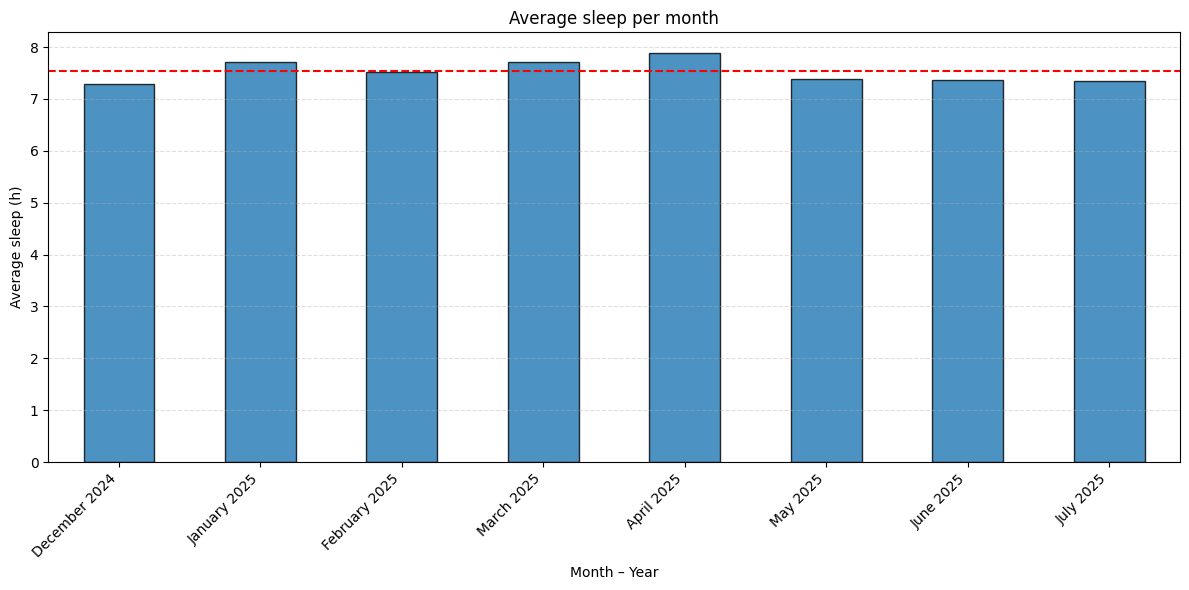

In [119]:
# Create a new column for Month - Year
df_sleepUnstacked['YearMonth'] = df_sleepUnstacked['calendarDate'].dt.to_period('M')

# Create a dataframe with average per month
avg = (
    df_sleepUnstacked
    .groupby('YearMonth')['Sleep Duration']
    .mean()
    .sort_index()
)

# Create a range of all of the months
all_months = pd.period_range(
    start=df_sleepUnstacked['YearMonth'].min(),
    end=  df_sleepUnstacked['YearMonth'].max(),
    freq='M'
)

# Re-sort
avg = avg.reindex(all_months, fill_value=pd.Timedelta(0))

# Labels are printed in 'Month name - YYYY' Format
labels = [p.strftime('%B %Y') for p in avg.index]

# Plot
plt.figure(figsize=(12, 6))
avg.plot(
    kind='bar',
    edgecolor='black',
    alpha=0.8,
    ax=plt.gca()
)
plt.xlabel('Month – Year')
plt.ylabel('Average sleep (h)')
plt.title('Average sleep per month')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.axhline(
    float(df_sleepUnstacked['Sleep Duration'].mean()),
    color='red',
    linestyle='--',
    linewidth=1.5,
)
plt.show()

Another interesting metric Garmin captures is the sleep Quality Score. This Quality score is based on different parametrs, such as REM sleep, deep sleep, duration, awakness time, breathing, etc. Let's see the quality of my sleep based on different months of the year, or even if there is a difference between the weekends and the working days!

C:\Users\alexa\AppData\Local\Temp\ipykernel_23264\289716103.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df_sleepCopy.groupby('weekday')['qualityScore'].mean().reindex(weekday_order)


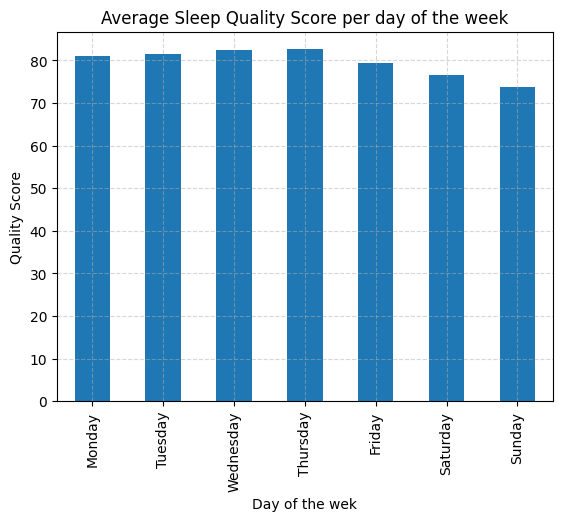

<Figure size 640x480 with 0 Axes>

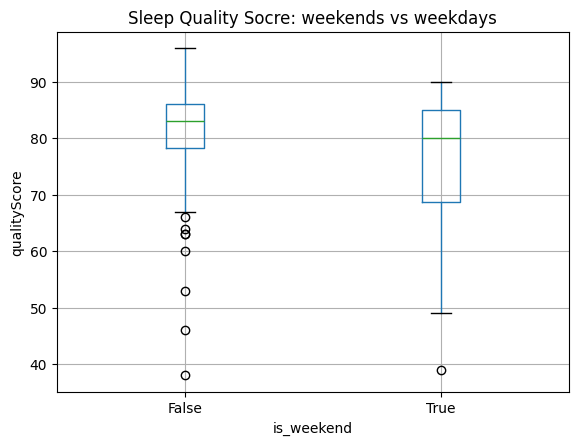

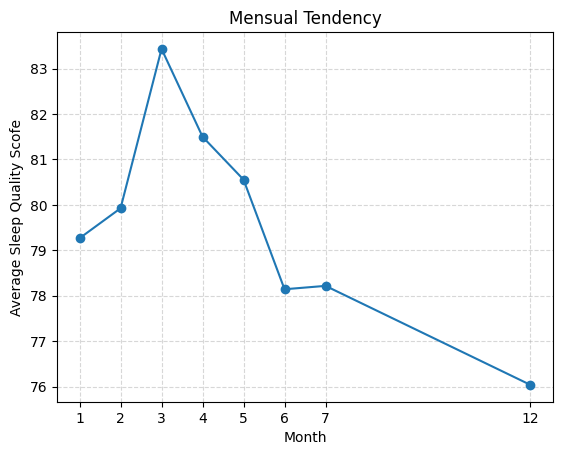

In [120]:
df_sleepCopy = df_sleepUnstacked.copy()

# Compute weekends and weekdays and months
df_sleepCopy['weekday'] = df_sleepCopy['calendarDate'].dt.day_name()
df_sleepCopy['is_weekend'] = df_sleepCopy['weekday'].isin(['Saturday', 'Sunday'])
df_sleepCopy['month'] = df_sleepCopy['calendarDate'].dt.month

# Average quality score per weekend/day
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sleepCopy['weekday'] = pd.Categorical(df_sleepCopy['weekday'], categories=weekday_order, ordered=True)
weekday_avg = df_sleepCopy.groupby('weekday')['qualityScore'].mean().reindex(weekday_order)

# Plot n1: average per day of the week
plt.figure()
weekday_avg.plot(kind='bar')
plt.xlabel('Day of the wek')
plt.ylabel('Quality Score')
plt.title('Average Sleep Quality Score per day of the week')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot n2: boxplot weekend/day
plt.figure()
df_sleepCopy.boxplot(column='qualityScore', by='is_weekend')
plt.title('Sleep Quality Socre: weekends vs weekdays')
plt.suptitle('')
plt.xlabel('is_weekend')
plt.ylabel('qualityScore')
plt.show()

# Plot n3: tendency
monthly_avg = df_sleepCopy.groupby('month')['qualityScore'].mean().sort_index()
plt.figure()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sleep Quality Scofe')
plt.title('Mensual Tendency')
plt.xticks(monthly_avg.index)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Although I sleep quite enough, on average. However, I want to examine when I typically go to sleep and when I usually wake up. To do so, first of all, I need to convert the GMT timezone to CET/CEST!

In [121]:
import pandas as pd

# Copiamos el DataFrame original
df = df_sleepUnstacked.copy()

# 1) Marcamos que los timestamps están en UTC:
df['sleepStartUTC'] = df['sleepStartTimestampGMT'].dt.tz_localize('UTC')
df['sleepEndUTC']   = df['sleepEndTimestampGMT'].dt.tz_localize('UTC')

# 2) Convertimos a la zona de Europa/Madrid (CET/CEST automáticamente según fecha)
df['sleepStartLocal'] = (
    df['sleepStartUTC']
      .dt.tz_convert('Europe/Madrid')
      .dt.tz_localize(None)   # opcional: quita la info de tz, dejando naive datetime
)
df['sleepEndLocal'] = (
    df['sleepEndUTC']
      .dt.tz_convert('Europe/Madrid')
      .dt.tz_localize(None)
)

# Resultado: sleepStartLocal y sleepEndLocal reflejan la hora local,
# y si al convertir cruzan la medianoche, la fecha en el propio timestamp se ajusta.
# calendarDate permanece tal cual.

# Plot start and end time!

### GPS Tracking Map

With the data that has been pulled, we can plot all the runs I've made using the GPS system Garmin has integrated in their Watches. Due to privacy reasons (I would not like to see published on the Internet my Address!), I will show only my Half Marathon in Seville :)

In [123]:
import glob
import gpxpy
import folium
from scipy.interpolate import interp1d
from matplotlib import colormaps

In [124]:
files = glob.glob('C:/Users/alexa/OneDrive/Documents/Code/Python/Projects/Garmin Data/garmin-connect-export-master/2025-07-25_garmin_connect_export/activity_18104317620.gpx')
cmap = colormaps['Spectral']
inter = interp1d([0, 365], [0, 1])

feature_group = folium.FeatureGroup()
all_coords = []

for file in files:
    with open(file, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    if gpx.tracks and gpx.tracks[0].type == 'running':
        try:
            coords = [(p.latitude, p.longitude)
                      for p in gpx.tracks[0].segments[0].points]
            all_coords.extend(coords)

            # color by day-of-year
            day = gpx.get_time_bounds()[0].timetuple().tm_yday
            rgb = cmap(inter(day))
            rgb = '#%02x%02x%02x' % tuple(round(255*x) for x in rgb[:-1])

            folium.PolyLine(coords, weight=0.5, color=rgb).add_to(feature_group)
        except Exception:
            pass

# Compute center of all points
if all_coords:
    lats, lons = zip(*all_coords)
    center = [sum(lats) / len(lats), sum(lons) / len(lons)]
else:
    center = [0, 0]  # fallback

route_map = folium.Map(
    location=center,
    zoom_start=12,
    tiles='CartodbDarkMatterNoLabels',
)

feature_group.add_to(route_map)
route_map


# Run Data Analysis

After being playing around with my own data, let's try to extract some information from my runs! I started running on March 2024. When I bought my Garmin watch, I was already focused on my Half-Marathon training plan. Let's take a look at some stats.

In [125]:
df_run = df_activities[df_activities['Activity Type'] == 'Running']
df_run.shape
df_run.info()

df_run.head()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 9 to 158
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   Start Time                             64 non-null     datetime64[ns, UTC]
 1   End Time                               64 non-null     object             
 2   Activity ID                            64 non-null     int64              
 3   Activity Name                          64 non-null     object             
 4   Description                            1 non-null      object             
 5   Location Name                          63 non-null     object             
 6   Time Zone                              64 non-null     object             
 7   Offset                                 64 non-null     object             
 8   Duration (h:m:s)                       64 non-null     object             
 9   Elapsed Duration

Start Time                   End Time  Activity ID  \
9  2025-07-15 04:57:13+00:00  2025-07-15T07:24:47+02:00  19736714765   
11 2025-07-12 06:25:53+00:00  2025-07-12T09:30:56+02:00  19706561166   
13 2025-07-10 04:50:06+00:00  2025-07-10T07:20:07+02:00  19695202111   
19 2025-06-30 04:51:51+00:00  2025-06-30T07:24:07+02:00  19586024281   
22 2025-06-19 19:25:12+00:00  2025-06-19T22:06:17+02:00  19485360382   

     Activity Name Description Location Name     Time Zone  Offset  \
9   Madrid Corrida         NaN        Madrid  Europe/Paris  +02:00   
11  Madrid Corrida         NaN        Madrid  Europe/Paris  +02:00   
13  Madrid Corrida         NaN        Madrid  Europe/Paris  +02:00   
19   Madrid - Base         NaN        Madrid  Europe/Paris  +02:00   
22   Madrid - Base         NaN        Madrid  Europe/Paris  +02:00   

   Duration (h:m:s) Elapsed Duration (h:m:s)  ... VO2max  \
9          00:27:34                 00:27:34  ...   51.0   
11         01:04:54                 01:05:03  ...   50.0   
13         00:30:01                 00:30:01  ...   50.0   
19         00:32:16                 00:32:16  ...   51.0   
22         00:41:05                 00:41:05  ...   51.0   

   Aerobic Training Effect Anaerobic Training Effect Avg. Run Cadence  \
9                      3.2                       NaN           164.88   
11                     4.3                       0.3           164.91   
13                     3.3                       NaN           164.42   
19                     3.1                       NaN           163.55   
22                     3.3                       NaN           159.72   

   Max. Run Cadence Stride Length    Steps   Weekday  YearMonth  \
9             176.0        110.13   4556.0   Tuesday    2025-07   
11            176.0        106.36  10690.0  Saturday    2025-07   
13            174.0        106.46   4934.0  Thursday    2025-07   
19            172.0        105.52   5282.0    Monday    2025-06   
22            167.0        107.09   6556.0  Thursday    2025-06   

       Duration_td  
9  0 days 00:27:34  
11 0 days 01:04:54  
13 0 days 00:30:01  
19 0 days 00:32:16  
22 0 days 00:41:05  

[5 rows x 46 columns]

### Calories estimation

It might be interesting to see how Garmin estimates Energy expenditure during the Running Activities. Runs are one of the most energy-consuming exercises there are there (if not the most). However, energetic requirements might vary from person to person based on Sex, Age and Weight, among other factors. Being these parameters fixed, I would love to see how Garmin estimates Energetic expenditure based on different parameters for my runs.

Let's explore the features

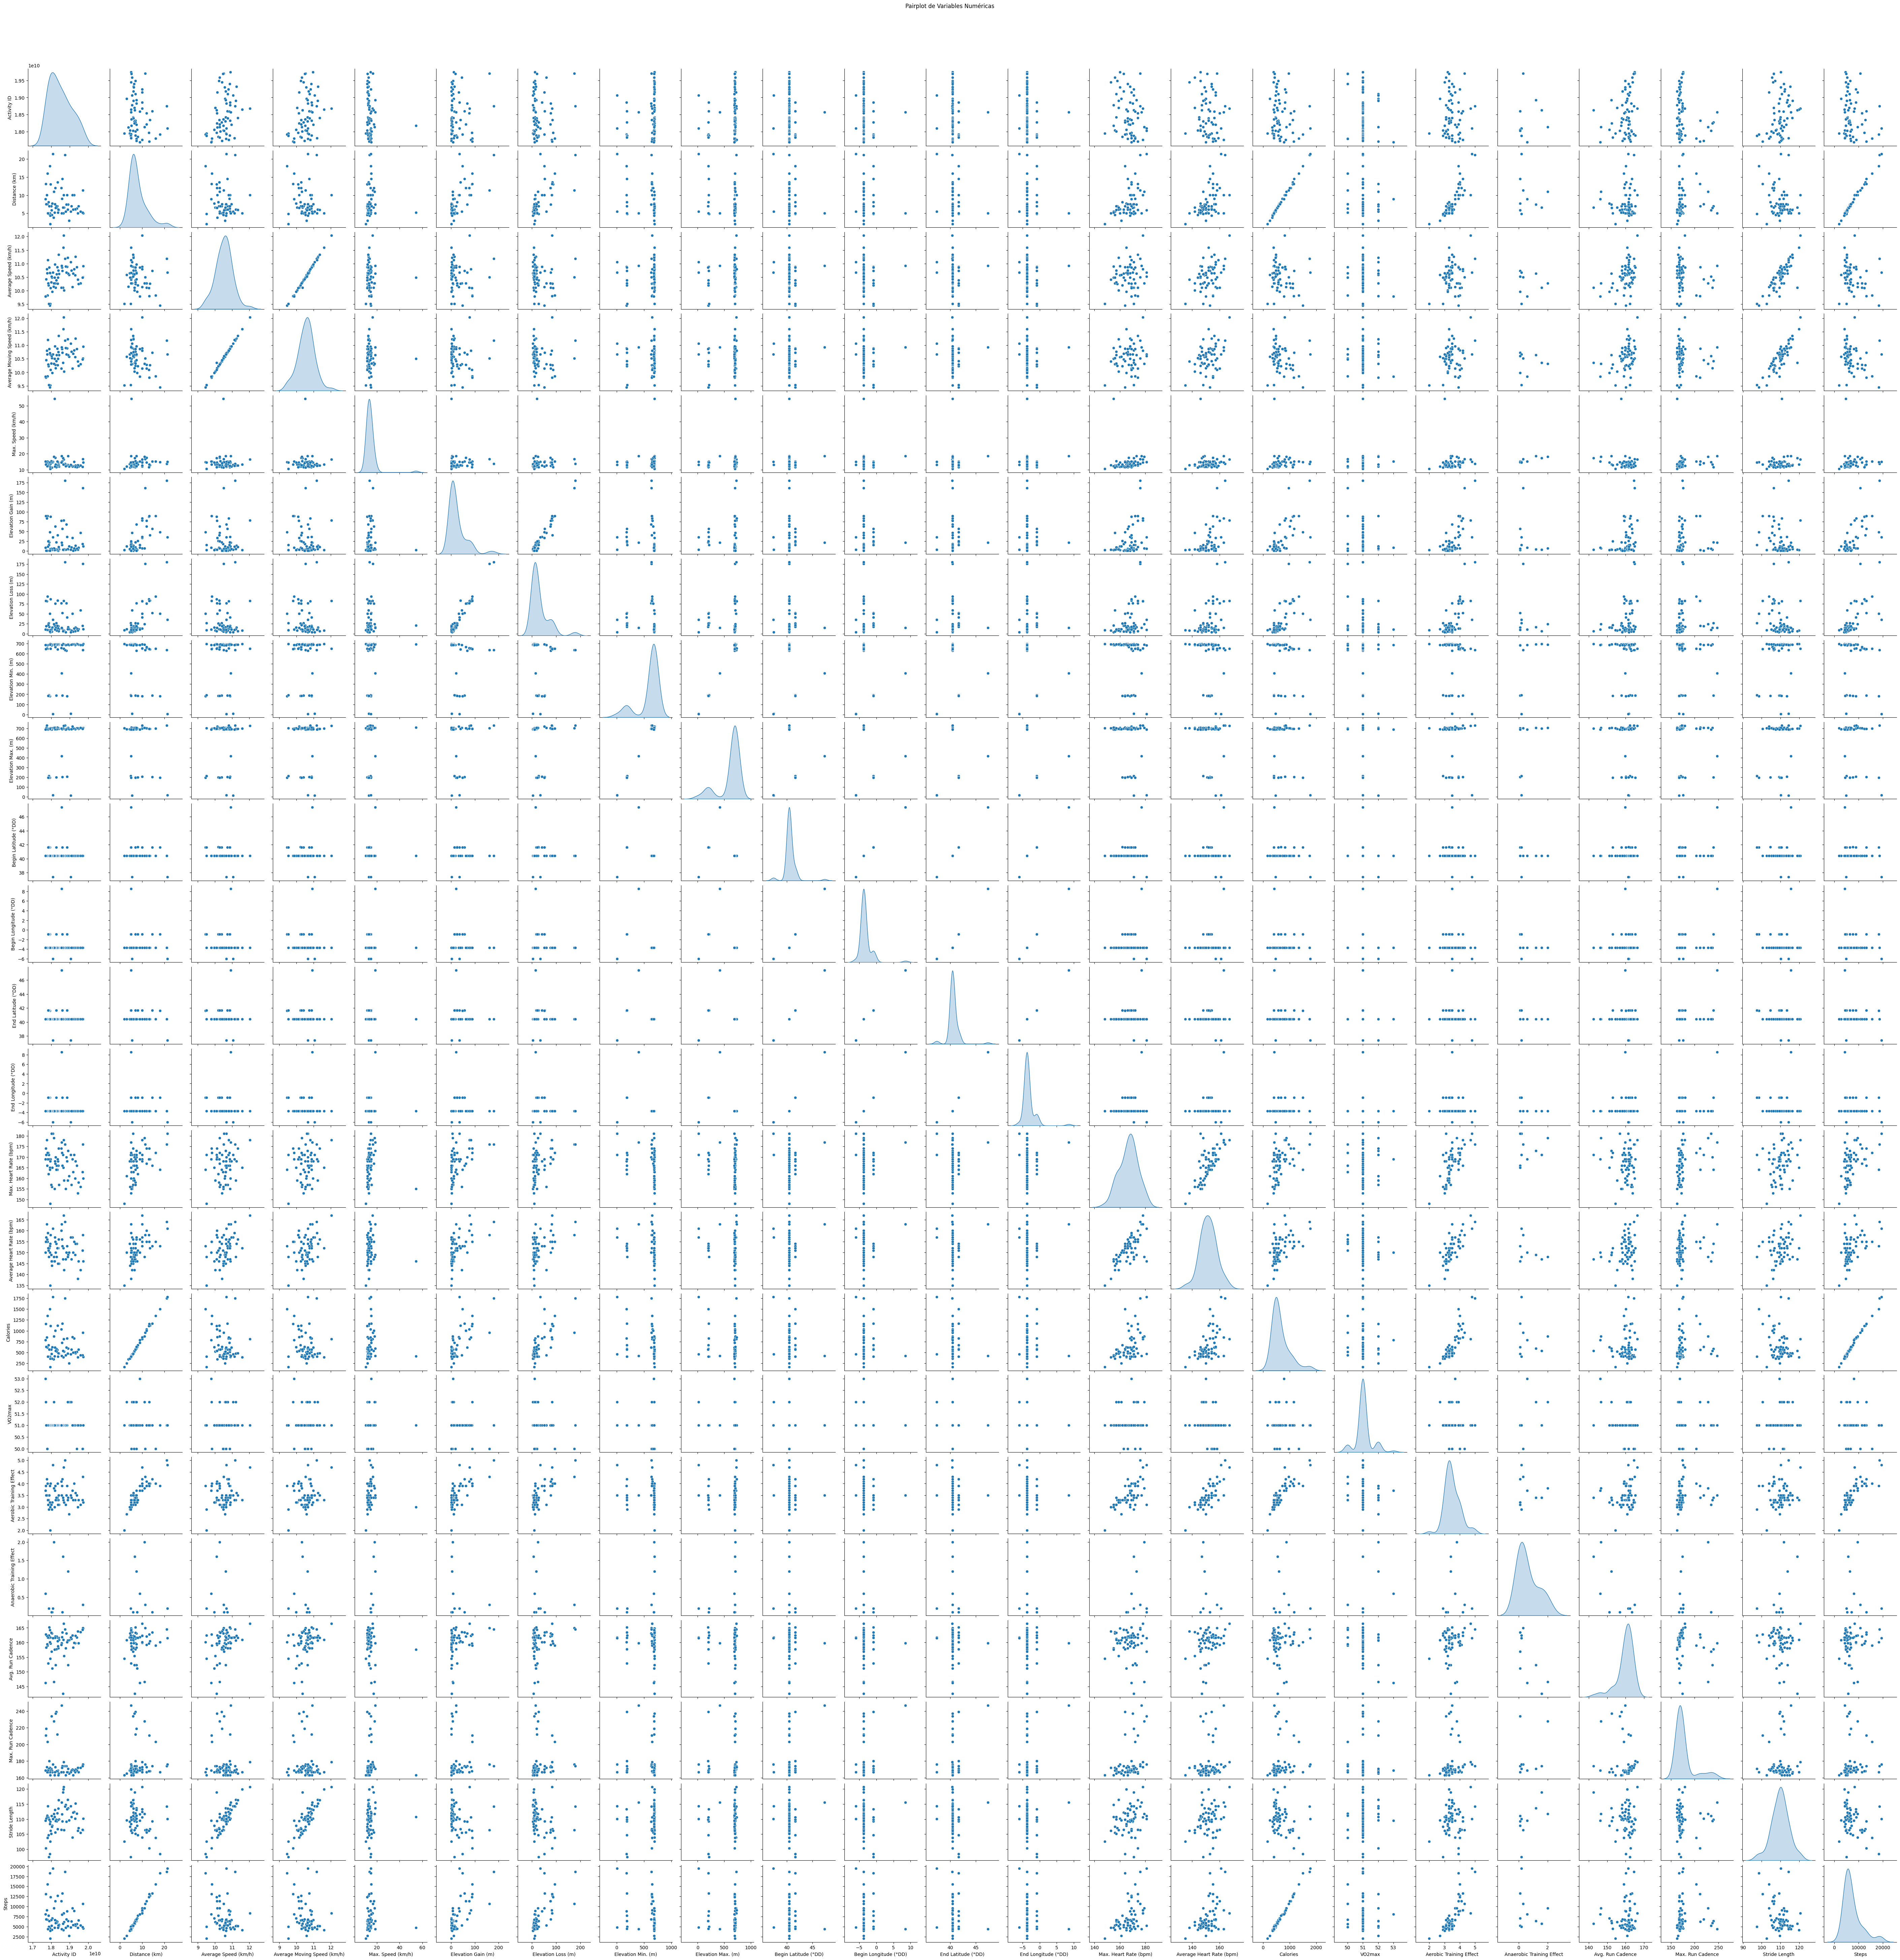

In [147]:
import numpy as np
import seaborn as sns
# Selección de variables numéricas (o un subconjunto que te interese)
numeric_df = df_run.select_dtypes(include=[np.number])

# Dibujar
sns.pairplot(numeric_df, diag_kind="kde", corner=False)  
# corner=True dibuja sólo media matriz (evita duplicados)
plt.suptitle("Pairplot de Variables Numéricas", y=1.02)
plt.show()

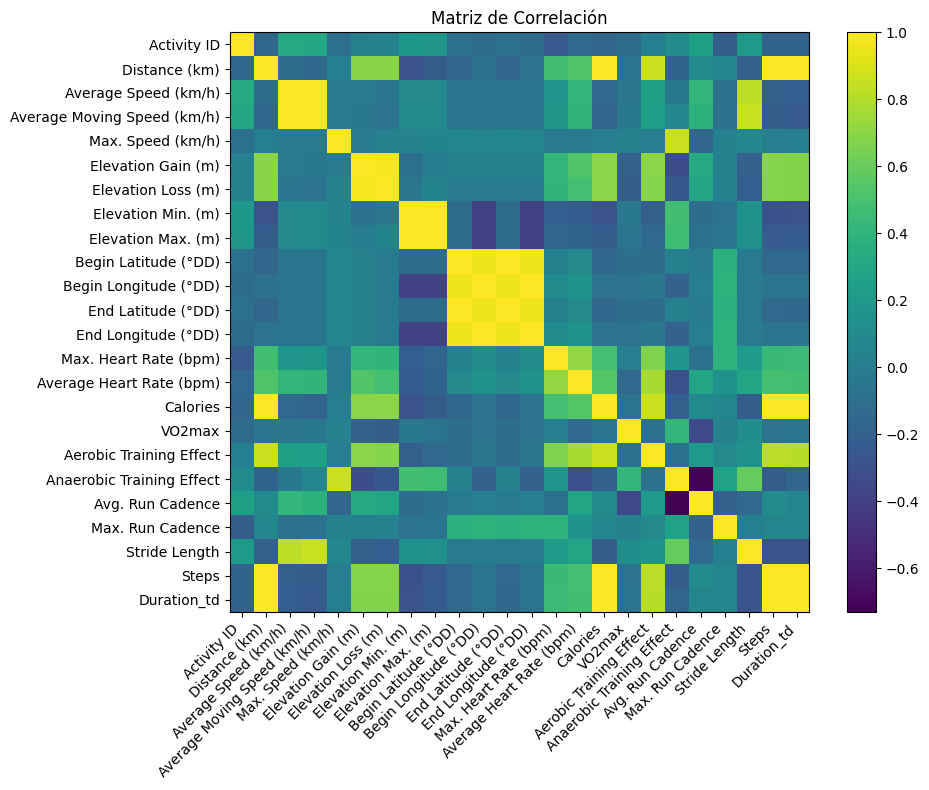

In [148]:
# Correlation matrix
corr = df_run.select_dtypes(include=[np.number]) \
                            .corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr.values)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)
plt.title('Matriz de Correlación')
plt.colorbar(im)
plt.tight_layout()
plt.show()

Interestingly, there is a very clear lineal relationship between kilometers run and Calories burnt!

<Figure size 1400x600 with 0 Axes>

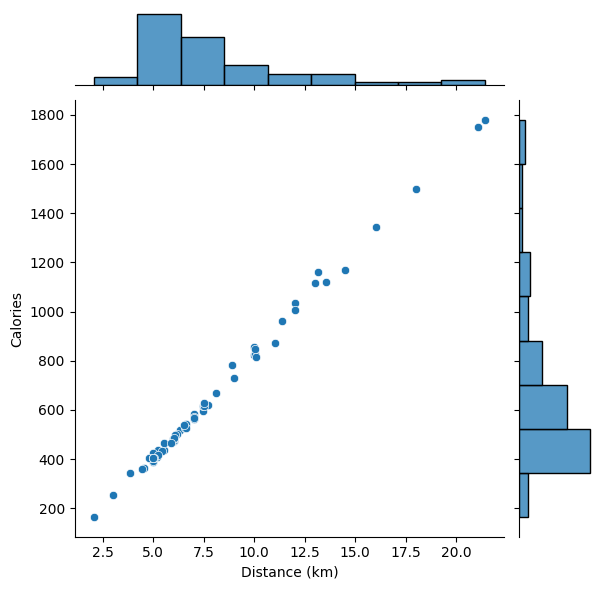

In [149]:
plt.figure(figsize=(14,6))
sns.jointplot(x=df_run['Distance (km)'],y=df_run['Calories'], data=df_run.dropna(),kind='scatter')

Maybe we can draft a regression over this data, and check the magnitude of this relationship.

Regression coef (slope): 84.5452
Ordenada al origen (intercept): -17.6648
Coeficiente de determinación R²: 0.9971


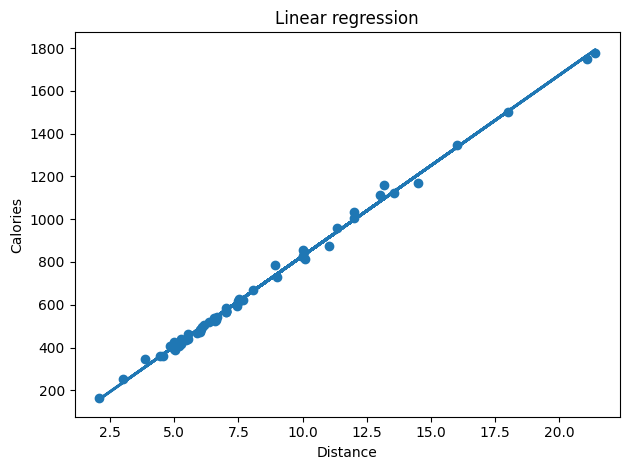

In [150]:
from sklearn.linear_model import LinearRegression

# Create vectors for data
X = df_run[['Distance (km)',]].dropna()
y = df_run.loc[X.index, 'Calories']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract relevante information from the model
slope = model.coef_[0]          # Coefficient
intercept = model.intercept_    # Intercept
r2 = model.score(X, y)          # Goodnes-of-fit

# Display results
print(f"Regression coef (slope): {slope:.4f}")
print(f"Ordenada al origen (intercept): {intercept:.4f}")
print(f"Coeficiente de determinación R²: {r2:.4f}")

# Plot regression line
plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X), linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Calories')
plt.title('Linear regression')
plt.tight_layout()
plt.show()


Unfortunately, LinearRegression does not provides the t statistic and p-values for their regression coefficients. We can either calculate them manually by applying Linear Algebra theory or use the statsmodel module to obtain them automatically.

In [151]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
est = sm.OLS(y, X_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.125e+04
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           2.41e-80
Time:                        21:26:09   Log-Likelihood:                -275.36
No. Observations:                  64   AIC:                             554.7
Df Residuals:                      62   BIC:                             559.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.6648      5.163     -3.422

Alright, it seems like this relationship is statistically significant! Let's try to check other features as well and create a more complete model. Since we have 45 variables, let's drop those that we know that do not impact Calories burnt.

In [152]:
# We preselect a few columns
selected_cols = ['Distance (km)','Duration_td','Steps','Stride Length','Max. Run Cadence','Avg. Run Cadence',
            'Average Heart Rate (bpm)','Max. Heart Rate (bpm)','Elevation Gain (m)','Elevation Loss (m)',
            'Max. Speed (km/h)','Average Speed (km/h)'
            ]

X3 = df_run[selected_cols].dropna()

y3 = df_run.loc[X3.index, 'Calories']
# Convert time delta to minutes

X3['Duration_td'] = X3['Duration_td'].dt.total_seconds() / 60

In [153]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 9 to 158
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Distance (km)             62 non-null     float64
 1   Duration_td               62 non-null     float64
 2   Steps                     62 non-null     float64
 3   Stride Length             62 non-null     float64
 4   Max. Run Cadence          62 non-null     float64
 5   Avg. Run Cadence          62 non-null     float64
 6   Average Heart Rate (bpm)  62 non-null     float64
 7   Max. Heart Rate (bpm)     62 non-null     float64
 8   Elevation Gain (m)        62 non-null     float64
 9   Elevation Loss (m)        62 non-null     float64
 10  Max. Speed (km/h)         62 non-null     float64
 11  Average Speed (km/h)      62 non-null     float64
dtypes: float64(12)
memory usage: 6.3 KB


Let's fit the lineal regression model

In [154]:
X3_const = sm.add_constant(X3)
model3 = sm.OLS(y3, X3_const).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4558.
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           2.71e-70
Time:                        21:26:09   Log-Likelihood:                -230.71
No. Observations:                  62   AIC:                             487.4
Df Residuals:                      49   BIC:                             515.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Before jumping into conclussions, it is good practice to check assumptions from the model!

Shapiro-Wilk → estadístico = 0.8783, p-valor = 0.0000
Breusch-Pagan → {'LM estadístico': np.float64(22.54725071216234), 'LM p-valor': np.float64(0.03182499405632668), 'F estadístico': np.float64(2.3336254651428963), 'F p-valor': np.float64(0.01865321708745624)}


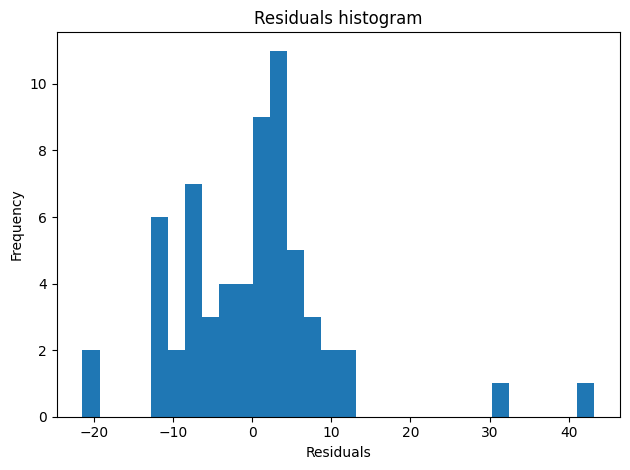

<Figure size 640x480 with 0 Axes>

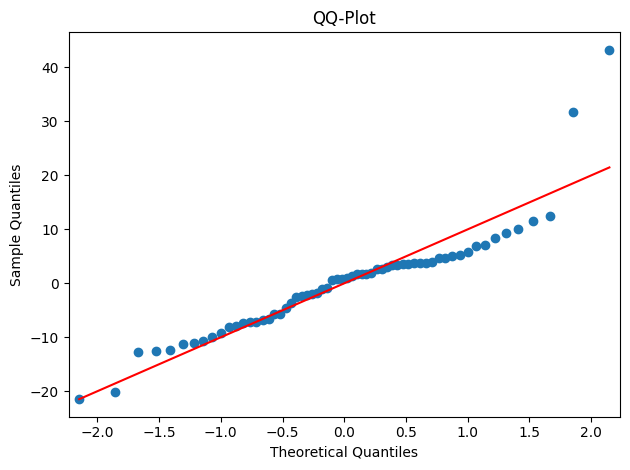

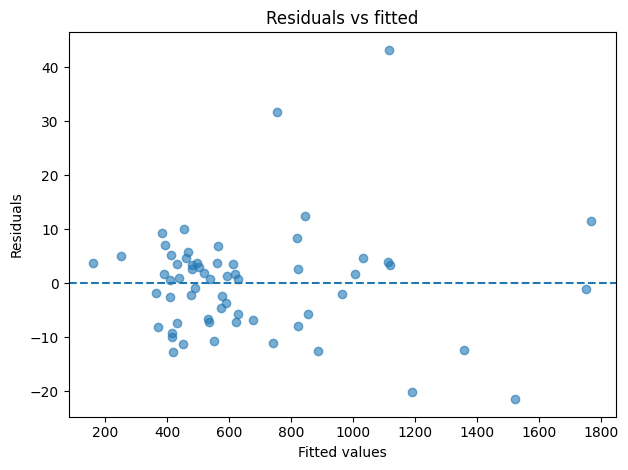

In [155]:
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Normality test
resid = model3.resid
stat_shapiro, p_shapiro = shapiro(resid)
print(f"Shapiro-Wilk → estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")

# Breusch-Pagan
bp_test = het_breuschpagan(resid, X3_const)
labels = ['LM estadístico', 'LM p-valor', 'F estadístico', 'F p-valor']
bp_results = dict(zip(labels, bp_test))
print("Breusch-Pagan →", bp_results)

# Model diagnosis

# Histogram of residuals
plt.figure()
plt.hist(resid, bins=30)
plt.title('Residuals histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# QQ-Plot
plt.figure()
qqplot(resid, line='s')
plt.title('QQ-Plot')
plt.tight_layout()
plt.show()

# Residuals vs fitted
fitted = model3.fittedvalues
plt.figure()
plt.scatter(fitted, resid, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted')
plt.tight_layout()
plt.show()

It seems like the residues are not following a normal distribution, however, I don't see it quite worrying, since the QQ-plot shows that the distribution has some heavy tails. There might be some residuals influencing this tails, however, it might not be have a big impact in the model. FItted value vs residuals seems more worrying, displaying some heterocedasticity. 

Let's try to fix this by adjusting the data to a Weighted Least Squares regression and a log-log transformation!.

Initial OLS summary:
                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5167.
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           1.26e-71
Time:                        21:26:09   Log-Likelihood:                 183.46
No. Observations:                  62   AIC:                            -340.9
Df Residuals:                      49   BIC:                            -313.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
con

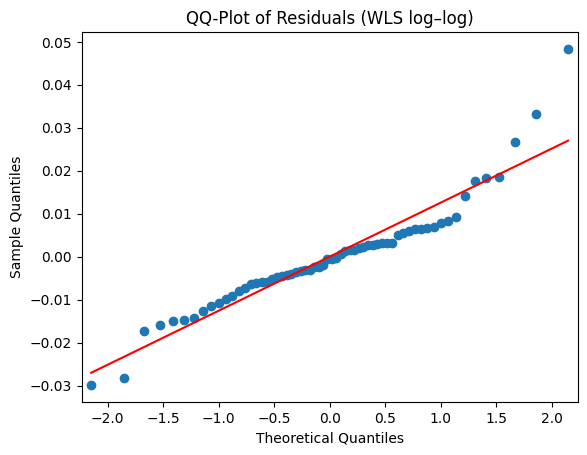

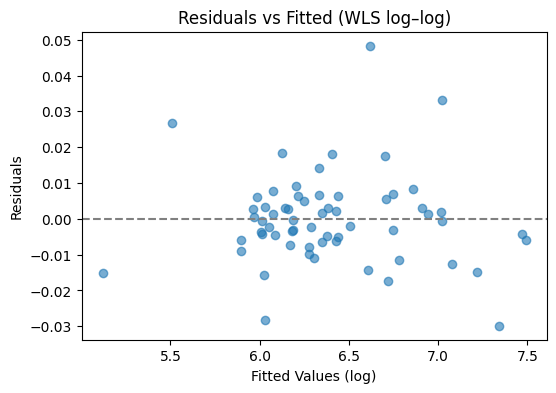

In [156]:
y4 = np.log(y3)    
X4 = np.log(X3)   
X4_const = sm.add_constant(X4)

# Fit log-log OLS
init_ols = sm.OLS(y4, X4_const).fit()
print("Initial OLS summary:")
print(init_ols.summary())

# Compute weights as 1 / y**2 (Var(y) ~ y**2)
fitted_vals = init_ols.fittedvalues
weights = 1.0 / (fitted_vals ** 2)

# Fit WLS
wls_model = sm.WLS(y4, X4_const, weights=weights).fit()
print("\nWLS (1/fitted²) summary:")
print(wls_model.summary())

# Check normality
sw_stat, sw_p = shapiro(wls_model.resid)
print(f"\nShapiro–Wilk (WLS): W={sw_stat:.3f}, p-value={sw_p:.3f}")

# Check homoskedasticity
bp_stat, bp_pvalue, _, _ = het_breuschpagan(wls_model.resid, X4_const)
print(f"Breusch–Pagan p-value (WLS): {bp_pvalue:.3f}")

# QQplot
qqplot(wls_model.resid, line='s')
plt.title('QQ-Plot of Residuals (WLS log–log)')
plt.show()

# Residuals vs Fitted
plt.figure(figsize=(6,4))
plt.scatter(wls_model.fittedvalues, wls_model.resid, alpha=0.6)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Fitted Values (log)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (WLS log–log)')
plt.show()

It seems like we have more homocedasticity in our residuals!

It seems like these variables explain ~99% of the variance in calories burnt per running session. Apparently, only average heart rate seems to be a clear, robust estimator of Calories burnt. I'm also seeing that distance, duration, average speed and elevation gain  appear to be important. I expect that the former 3 are highly correlated, so we might be having some multicollinearity issues here. Let's check it by computing the Compute Variance-Inflation Factors (VIFs)

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Build DataFrame of VIFs
vif_data = []
for i, col in enumerate(X4_const.columns):
    vif = variance_inflation_factor(X4_const.values, i)
    vif_data.append((col, vif))

vif_df = pd.DataFrame(vif_data, columns=['variable', 'VIF']).set_index('variable')
print(vif_df)


                                   VIF
variable                              
const                     6.508415e+08
Distance (km)             7.183566e+06
Duration_td               7.410635e+06
Steps                     2.687946e+04
Stride Length             4.983918e+01
Max. Run Cadence          1.324249e+00
Avg. Run Cadence          1.021789e+02
Average Heart Rate (bpm)  4.510061e+00
Max. Heart Rate (bpm)     3.668030e+00
Elevation Gain (m)        3.781389e+00
Elevation Loss (m)        4.711520e+00
Max. Speed (km/h)         1.262094e+00
Average Speed (km/h)      8.021429e+04


As expected, VIF values for duration, distance, steps, average speed and average run cadence are quite high! These variables are measuring similar stuff! Let's drop a few variables.

In [158]:
X_reduced = X4.drop(columns=['Average Speed (km/h)','Steps','Duration_td'])
Xr_const  = sm.add_constant(X_reduced)

init = sm.OLS(y4, Xr_const).fit()
weights = 1.0 / (init.fittedvalues ** 2)
wls_reduced = sm.WLS(y4, Xr_const, weights=weights).fit()
print(wls_reduced.summary())

vif_data = [(col, variance_inflation_factor(Xr_const.values, i))
            for i, col in enumerate(Xr_const.columns)]
print(pd.DataFrame(vif_data, columns=['variable','VIF']).set_index('variable'))


                            WLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6186.
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           1.69e-75
Time:                        21:26:10   Log-Likelihood:                 178.80
No. Observations:                  62   AIC:                            -337.6
Df Residuals:                      52   BIC:                            -316.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

It seems like dropping these variables has not decreased the Goodness-of-fit of the regression and the multicollinearity issue has been solved. We can see that Distance, stride length, average cadence and average heart beat are robust estimators of calories burnts (which is ulitmately estimated by the Garmin software).

This morning I went for a runm let's try and predict the calories burnt!

I am attaching the sessions summary:

In [159]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# New data from this morning's run!
new_data = {
    'Distance (km)':            [7.68],
    'Stride Length':            [110],
    'Max. Run Cadence':         [169],
    'Avg. Run Cadence':         [163],
    'Average Heart Rate (bpm)': [140],
    'Max. Heart Rate (bpm)':    [161],
    'Elevation Gain (m)':       [67],
    'Elevation Loss (m)':       [95],
    'Max. Speed (km/h)':        [13.2],
}

# Convert to pd dataframe
df_new = pd.DataFrame(new_data)
X_new = df_new.copy()

# log transform
X_new_log = np.log(X_new)
X_new_const = sm.add_constant(X_new_log,has_constant="add")

# Predict and reconvert to normal scale
log_cal_pred = wls_reduced.predict(X_new_const)

cal_pred = np.exp(log_cal_pred)

print(f"In this run, you have burnt: {cal_pred.values[0]:.1f} kcal")


In this run, you have burnt: 592.0 kcal


Actually, my Garmin predicts 575 kcal, which is close enough!

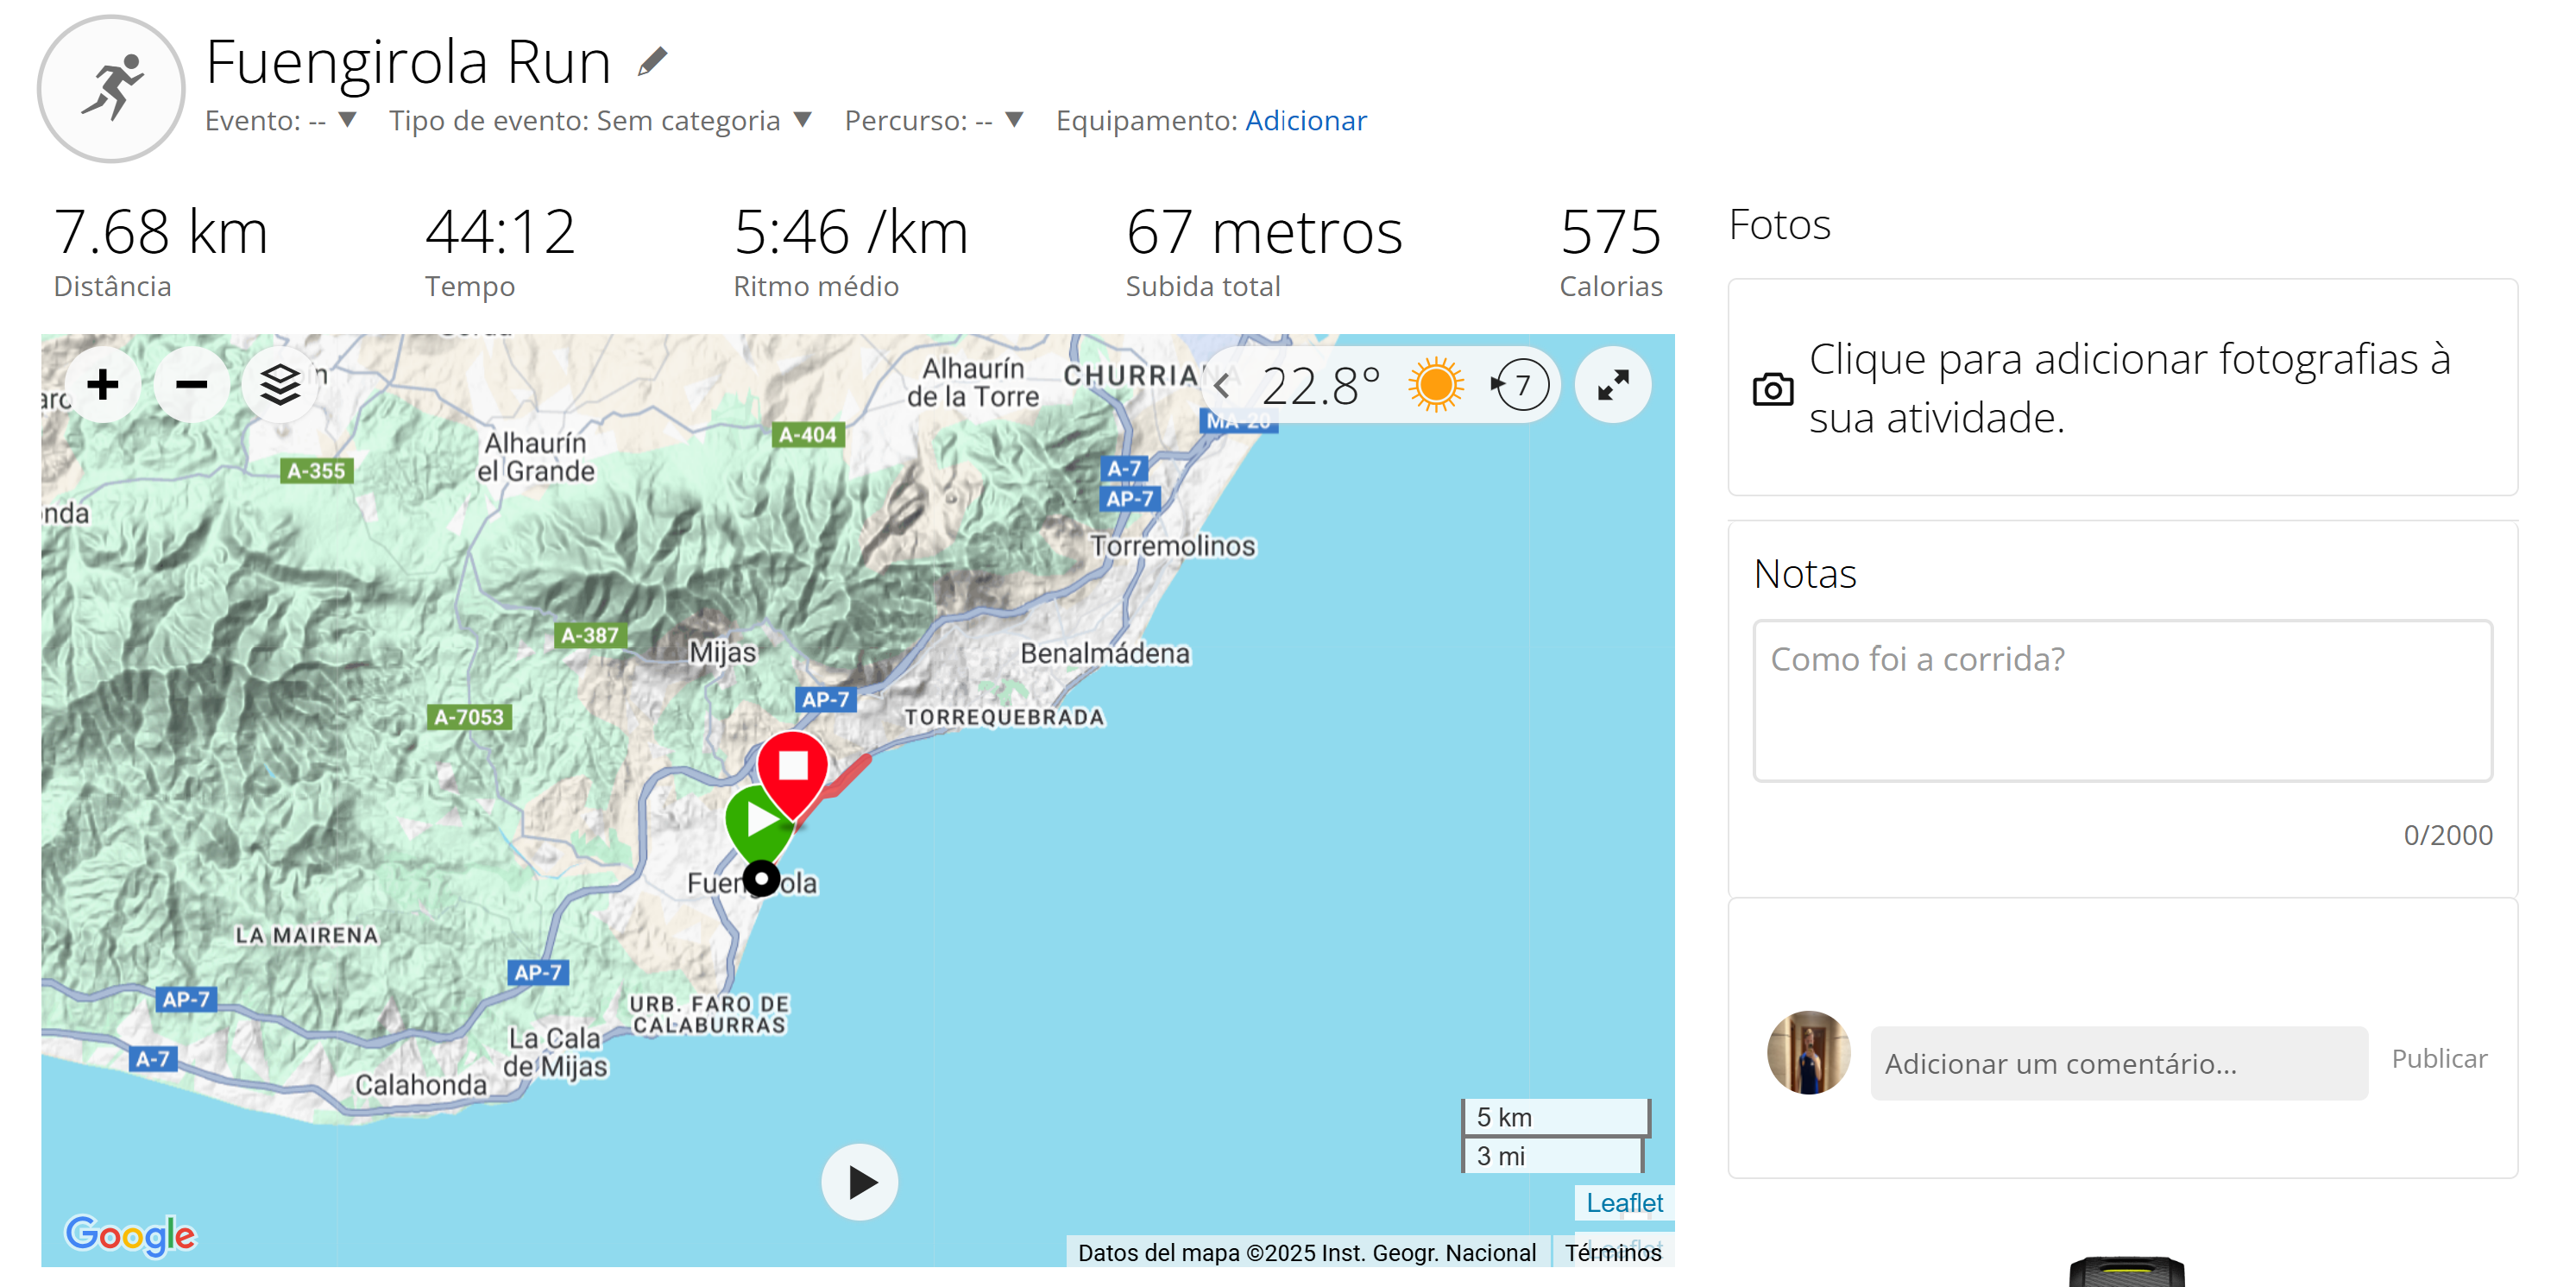

In [6]:
%matplotlib inline
from IPython.display import Image
Image('C:/Users/alexa/OneDrive/Documents/Code/Python/Projects/Garmin Data/img/Run_1.png')

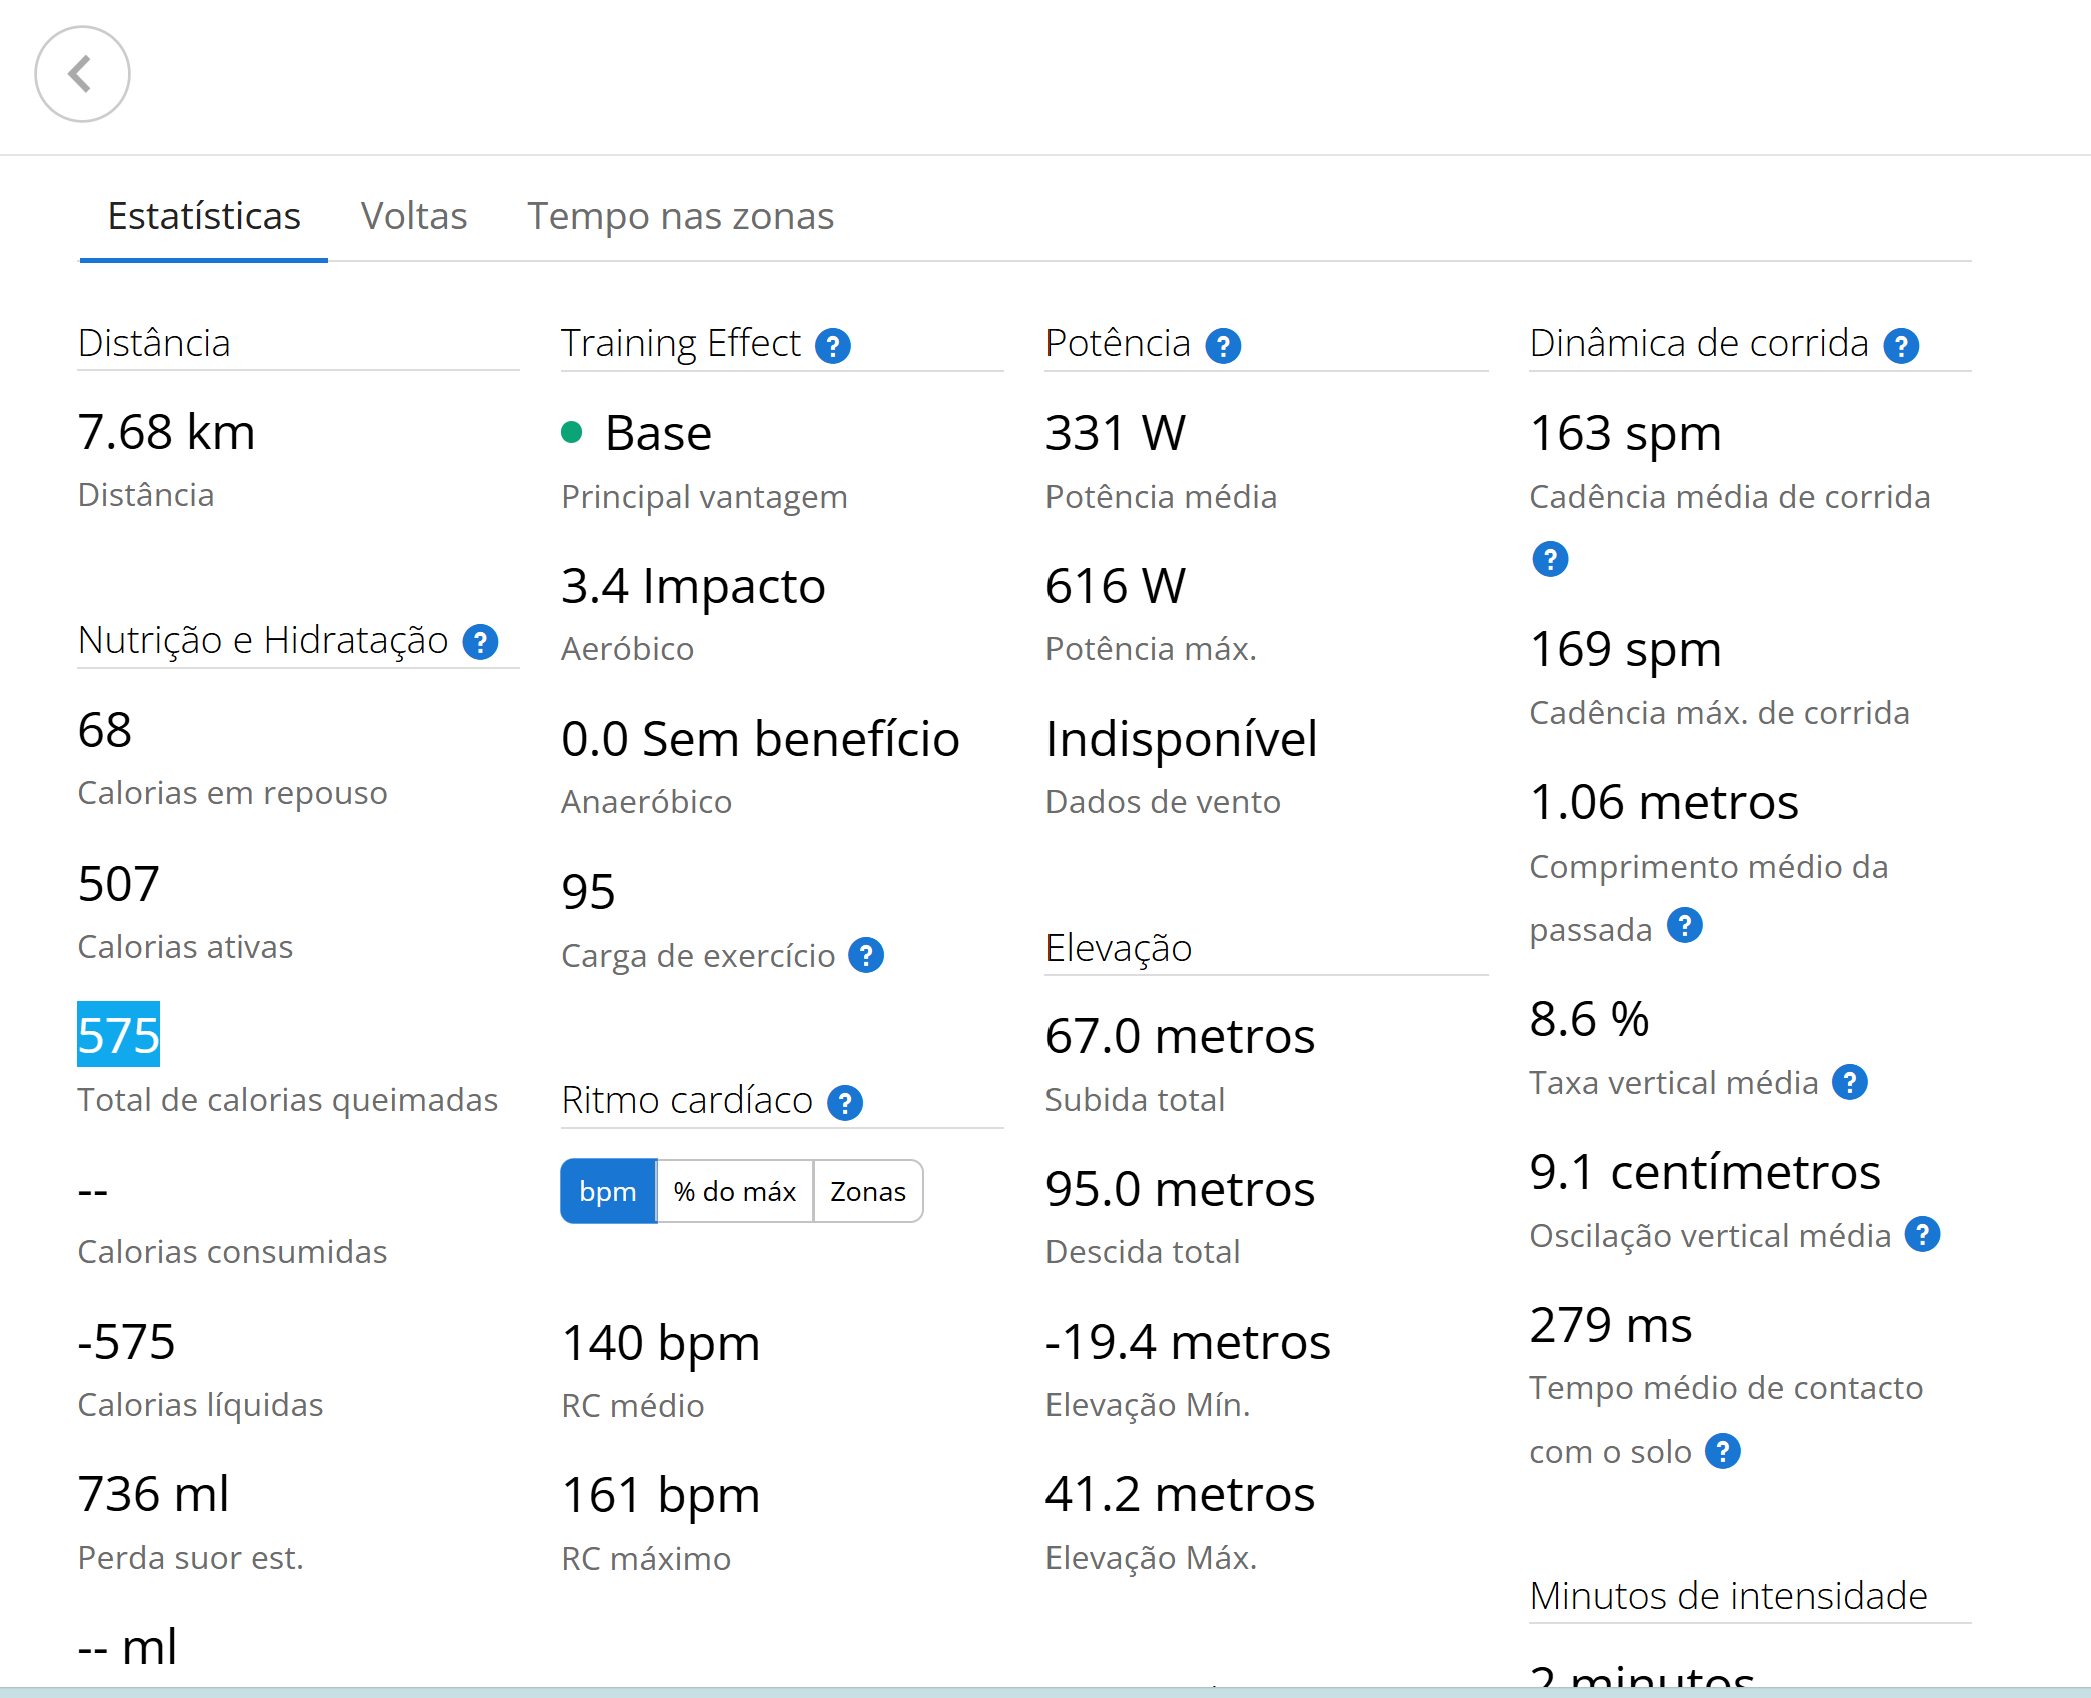

In [7]:
Image('C:/Users/alexa/OneDrive/Documents/Code/Python/Projects/Garmin Data/img/Run_2.png')

Energetic expenditure might also depend on other factors not included in the initial dataset, such as weight. When I started training with my Garmin, I was weighting slightly more, so a couple of months back I changed that information. This might alter Calories burn estimation by Garmin's algorithm. Most of my runs were estimated with my old weight, which explains this slight overestimation of my model.

Age might also be a factor, but I don't think it would make much of a difference!

### Unsupervised Clustering of run data

Something interasting we can investigate is if a Clustering algorithm is able to differenciate my runs into different categories! When I was training for my Half Marathons, I typically had an easy run, a long run and a tempo run/intervals. I would love to see if this algorithm finds a similar pattern, or if new types of runs appear in my data!

#### Preprocessing, missing values and feature selection

Before running into the algorithm, I would like to take a look at my missing data.

In [139]:
# Checking NAs
missing_counts = df_run.isnull().sum().sort_values(ascending=False)
missing_pct = (df_run.isnull().mean() * 100).sort_values(ascending=False)

# Juntamos en un DataFrame para verlo más claro
missing_summary = pd.concat([missing_counts, missing_pct], axis=1, keys=['n_missing','pct_missing'])
missing_summary

n_missing  pct_missing
Description                                   63      98.4375
Anaerobic Training Effect                     54      84.3750
Elevation Gain (m)                             2       3.1250
VO2max                                         1       1.5625
Moving Duration (h:m:s)                        1       1.5625
Location Name                                  1       1.5625
Average Moving Speed (km/h or min/km)          1       1.5625
Max. Speed (km/h)                              1       1.5625
Max. Speed (km/h or min/km)                    1       1.5625
Elevation Loss (m)                             1       1.5625
Device                                         1       1.5625
Average Moving Speed (km/h)                    1       1.5625
Elevation Max. (m)                             1       1.5625
Begin Latitude (°DD)                           1       1.5625
Steps                                          1       1.5625
Avg. Run Cadence                               1       1.5625
Max. Run Cadence                               1       1.5625
Stride Length                                  1       1.5625
Aerobic Training Effect                        1       1.5625
Max. Heart Rate (bpm)                          1       1.5625
Begin Longitude (°DD)                          1       1.5625
Elevation Min. (m)                             1       1.5625
End Latitude (°DD)                             1       1.5625
End Longitude (°DD)                            1       1.5625
Average Heart Rate (bpm)                       1       1.5625
End Time                                       0       0.0000
Start Time                                     0       0.0000
Activity Name                                  0       0.0000
Time Zone                                      0       0.0000
Activity ID                                    0       0.0000
Event Type                                     0       0.0000
Activity Type                                  0       0.0000
Activity Parent                                0       0.0000
Elapsed Duration (h:m:s)                       0       0.0000
Offset                                         0       0.0000
Duration (h:m:s)                               0       0.0000
Distance (km)                                  0       0.0000
Average Speed (km/h)                           0       0.0000
Elevation Corrected                            0       0.0000
File Format                                    0       0.0000
Average Speed (km/h or min/km)                 0       0.0000
Privacy                                        0       0.0000
Calories                                       0       0.0000
Weekday                                        0       0.0000
YearMonth                                      0       0.0000
Duration_td                                    0       0.0000

In [140]:
df_run.describe().T


count                    mean  \
Activity ID                  64.0        18502980267.6875   
Distance (km)                64.0                7.994535   
Average Speed (km/h)         64.0                10.53764   
Average Moving Speed (km/h)  63.0               10.565372   
Max. Speed (km/h)            63.0                 14.3552   
Elevation Gain (m)           62.0                    26.0   
Elevation Loss (m)           63.0                31.52381   
Elevation Min. (m)           63.0              591.803175   
Elevation Max. (m)           63.0              610.936508   
Begin Latitude (°DD)         63.0               40.609221   
Begin Longitude (°DD)        63.0               -3.223347   
End Latitude (°DD)           63.0               40.608254   
End Longitude (°DD)          63.0               -3.224317   
Max. Heart Rate (bpm)        63.0              166.809524   
Average Heart Rate (bpm)     63.0              151.730159   
Calories                     64.0              658.234375   
VO2max                       63.0               51.063492   
Aerobic Training Effect      63.0                3.501587   
Anaerobic Training Effect    10.0                    0.64   
Avg. Run Cadence             63.0              159.804444   
Max. Run Cadence             63.0              177.571429   
Stride Length                63.0              109.838095   
Steps                        63.0             7379.333333   
Duration_td                    64  0 days 00:45:44.562500   

                                                   std              min  \
Activity ID                           584254245.159401    17695650735.0   
Distance (km)                                 3.945679          2.07868   
Average Speed (km/h)                          0.484387           9.4464   
Average Moving Speed (km/h)                   0.479912         9.448487   
Max. Speed (km/h)                             5.426437          10.5156   
Elevation Gain (m)                           37.363961              1.0   
Elevation Loss (m)                           37.283075              4.0   
Elevation Min. (m)                            198.8263              7.8   
Elevation Max. (m)                          201.405138             12.8   
Begin Latitude (°DD)                          1.114868        37.372739   
Begin Longitude (°DD)                         1.838614        -5.989897   
End Latitude (°DD)                            1.114543        37.372711   
End Longitude (°DD)                           1.839202        -5.989846   
Max. Heart Rate (bpm)                         7.244257            148.0   
Average Heart Rate (bpm)                       6.08331            135.0   
Calories                                    334.074355            165.0   
VO2max                                        0.503953             50.0   
Aerobic Training Effect                       0.503373              2.0   
Anaerobic Training Effect                     0.704273              0.1   
Avg. Run Cadence                              4.608838           142.58   
Max. Run Cadence                             20.803779            163.0   
Stride Length                                 4.597206            97.43   
Steps                                      3740.980068           2026.0   
Duration_td                  0 days 00:23:07.526449054  0 days 00:13:07   

                                                25%              50%  \
Activity ID                          18001978434.75    18379566503.5   
Distance (km)                              5.408405           6.8316   
Average Speed (km/h)                        10.2528           10.575   
Average Moving Speed (km/h)               10.286161        10.597899   
Max. Speed (km/h)                           12.3282          13.2696   
Elevation Gain (m)                              3.0              8.5   
Elevation Loss (m)                             10.0             15.0   
Elevation Min. (m)                            647.

As you can see, we have a couple of variables where the missing value porcentage is quite high, so we might drop them directly. Also, we have a few variables that might skew the algorithm, such as latitud, longitud or date (and timezone) when the workout was done. Also, we might want to drop features that might add multicolinearity (such as Speed in min/km or Moving speed and start and end time).

We will also convert the Duration timedelta variable to seconds and will drop the Activity Type column, since all runs will be Runs.

In [141]:
# Drop unnecessay columns
drop = [
    'Description', 'Anaerobic Training Effect',
    'Begin Latitude (°DD)', 'Begin Longitude (°DD)',
    'End Latitude (°DD)',   'End Longitude (°DD)',
    'Weekday', 'YearMonth',
    'Activity ID', 'Activity Name', 'Location Name',
    'Device', 'Time Zone', 'Offset',
    'File Format', 'Privacy',
    'Duration (h:m:s)', 'Elapsed Duration (h:m:s)',
    'Moving Duration (h:m:s)',
    'Average Speed (km/h or min/km)',
    'Average Moving Speed (km/h or min/km)',
    'Max. Speed (km/h or min/km)',
    'Elevation Min. (m)', 'Elevation Max. (m)',
    'Average Moving Speed (km/h)',
    'Event Type','Activity Type',
    'Elevation Corrected',
    'Start Time', 'End Time', 'Activity Parent'
]

# Drop colums and convert duration to seconds
df_clean = df_run.drop(columns = drop)
df_clean['duration_sec'] = df_clean['Duration_td'].dt.total_seconds()
df_clean = df_clean.drop(columns=['Duration_td'])



# Check everything is OK
print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 9 to 158
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Distance (km)             64 non-null     float64
 1   Average Speed (km/h)      64 non-null     float64
 2   Max. Speed (km/h)         63 non-null     float64
 3   Elevation Gain (m)        62 non-null     float64
 4   Elevation Loss (m)        63 non-null     float64
 5   Max. Heart Rate (bpm)     63 non-null     float64
 6   Average Heart Rate (bpm)  63 non-null     float64
 7   Calories                  64 non-null     float64
 8   VO2max                    63 non-null     float64
 9   Aerobic Training Effect   63 non-null     float64
 10  Avg. Run Cadence          63 non-null     float64
 11  Max. Run Cadence          63 non-null     float64
 12  Stride Length             63 non-null     float64
 13  Steps                     63 non-null     float64
 14  duration_sec    

#### Data imputation and scaling

OK, once we have our dataset ready, let's impute the NAs with the median. We have very little NA values in a few varaibles, so the median imputation is a good approach and more robust than the mean. If we had way more missing values, it might be interesting to check for any pattern of our missing values (MCAR, MAR or MNAR) and implement a more sophisticated imputation technique, since it would not reduce the variability of the data.

On the other hand, all ML algorithms that depend on computing the Euclidean distance are sensitive to features magnitudes. If we wouldn't scale the variables' values, those with bigger values would dominate these distances values. That's why it is important to scale al the predictors.

In [142]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


num_cols = df_clean.select_dtypes(include=['float64','int64']).columns          # Extract numeric variables
imputer = SimpleImputer(strategy='median')                                      # impute median,more robust than the mean! Very little NAs
scaler  = StandardScaler()                                                      # Scale features: mean 0, SD 1

X_num = imputer.fit_transform(df_clean[num_cols])
X_scaled = scaler.fit_transform(X_num)

#### Setting the algorithm parameters

Once we've prep'd our data, lets find the best parametrs for our model. I don't expect to see more thatn 5 groups, so the best approach is to see if my runs can be grouped in as much as 5 groups. This is represented by k, which represents the number of clusters the algorithm will be looking. 

By assuming each value of k (between 2 to 5), we can calculate the Shiloutte score. The Shiloutte score can take values from -1 to 1. A shiloutte value near to 1 means that each observation has been assigned correctly to a group (close to their group and away from others), whereas -1 means the opposite. Values near 0 menas that there is some overlapping between clusters.

In [143]:
# Search for the best shiloutte for 2 to 5 k-groups
sil_scores = {}
for k in range(2, 6):                                       
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

print(sil_scores)

{2: 0.38860006103135847, 3: 0.1948720148072741, 4: 0.20560691061946854, 5: 0.19176365089895936}


Apparently, the best k value is 2. With this ifnormation, let's build the clusters. These clusters are built by computing the centroid of each cluster. This centroid is a point in space which represents the center of each cluster. These centroids minimize the cuadratic sum of distances within each cluster.

#### Run the model

Once computed, we assign to each observation a cluster (either cluster #1 or #2 in this particular case)

In [144]:

best_k = 2
km_final = KMeans(n_clusters=best_k, random_state = 123) # Initialize the algorithm and we add a seed for reproducibility
labels = km_final.fit_predict(X_scaled)                  # Fit the model.

# We create a new variable to assign each observation to a cluster
df_clean['cluster'] = labels

print("Cluster size:\n", df_clean['cluster'].value_counts())

# Pull the centroids of each cluster
centers_scaled = km_final.cluster_centers_
# Invert the scale applied before
centers_orig = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_orig, columns=num_cols)
print("\nCentroid of each cluster:\n", centers_df)


Cluster size:
 cluster
0    50
1    14
Name: count, dtype: int64

Centroid of each cluster:
    Distance (km)  Average Speed (km/h)  Max. Speed (km/h)  Elevation Gain (m)  \
0       6.306795             10.570933          14.289048           10.160000   
1      14.022177             10.418734          14.513914           80.071429   

   Elevation Loss (m)  Max. Heart Rate (bpm)  Average Heart Rate (bpm)  \
0                15.8             165.280000                150.000000   
1                86.5             172.357143                157.928571   

      Calories     VO2max  Aerobic Training Effect  Avg. Run Cadence  \
0   513.340000  51.100000                 3.306000        159.197000   
1  1175.714286  50.928571                 4.192857        162.057143   

   Max. Run Cadence  Stride Length     Steps  duration_sec  
0        177.540000     110.536000   5746.32   2149.920000  
1        177.071429     107.351429  13131.00   4868.285714  


Apparently, we have two clusters: one for short runs, with very little elevation gain and loss, which seem to be recovery runs or easy runs. On the other hand, we have longer runs that have a bigger elevation change. This makes a lot of sense! Let's plot

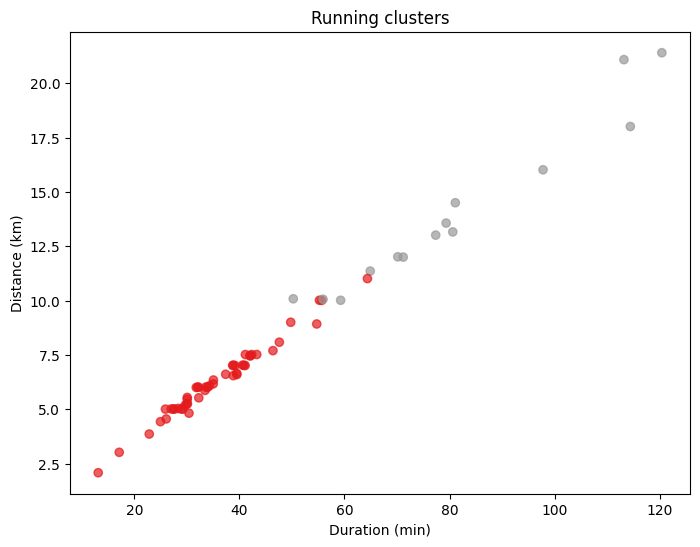

In [145]:
# Change back to minutes instead of seconds for better readibility
mins = df_clean['duration_sec'] / 60

plt.figure(figsize=(8,6))
plt.scatter(mins, df_clean['Distance (km)'], c=df_clean['cluster'], cmap='Set1', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Distance (km)')
plt.title('Running clusters')
plt.show()
